# Brain MRI Classification (2)
### Alexandru LICURICEANU - 341C4

### Setup

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from collections import Counter
from torch.utils.data import WeightedRandomSampler, DataLoader, Subset
import torchvision.transforms as transforms
from torchvision import models
import PIL
from PIL import Image, ImageFilter
import cv2
from tqdm import tqdm
import sys
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
import torch.nn.functional as F
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

LABELS = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

%matplotlib inline
plt.style.use('default')

In [2]:
class BrainTumorDataset(torch.utils.data.Dataset):

    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.image_paths = []
        self.image_labels = []

        self.labels = LABELS

        for label in self.labels:

            label_dir = os.path.join(root_dir, label)
            if os.path.isdir(label_dir):

                for file_name in os.listdir(label_dir):
                    file_path = os.path.join(label_dir, file_name)
                    self.image_paths.append(file_path)
                    self.image_labels.append(label)

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, index):
        image_path = self.image_paths[index]
        label = self.image_labels[index]

        image = PIL.Image.open(image_path)
        
        if self.transform:
            image = self.transform(image)
        
        label = self.labels.index(label)
        
        return image, label
    

train_set = BrainTumorDataset(root_dir='./Training')
test_set = BrainTumorDataset(root_dir='./Testing')

print(f"Train size: {len(train_set)}, Test size: {len(test_set)}")

Train size: 2870, Test size: 394


## Task 1

cuda
Fold 1/5
Epoch 1/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.57it/s, loss=0.329]


Train Loss: 0.6913, Train Acc: 0.7234
Val Loss: 0.3287, Val Acc: 0.8937
Epoch 2/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  7.00it/s, loss=0.242]


Train Loss: 0.2711, Train Acc: 0.9029
Val Loss: 0.2419, Val Acc: 0.9286
Epoch 3/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.96it/s, loss=0.184]


Train Loss: 0.1527, Train Acc: 0.9543
Val Loss: 0.1845, Val Acc: 0.9460
Epoch 4/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.83it/s, loss=0.149] 


Train Loss: 0.0842, Train Acc: 0.9804
Val Loss: 0.1487, Val Acc: 0.9530
Epoch 5/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.92it/s, loss=0.172] 


Train Loss: 0.0520, Train Acc: 0.9922
Val Loss: 0.1716, Val Acc: 0.9460
Epoch 6/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s, loss=0.13]  


Train Loss: 0.0329, Train Acc: 0.9952
Val Loss: 0.1302, Val Acc: 0.9564
Epoch 7/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.34it/s, loss=0.143] 


Train Loss: 0.0254, Train Acc: 0.9978
Val Loss: 0.1428, Val Acc: 0.9547
Epoch 8/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.44it/s, loss=0.139] 


Train Loss: 0.0116, Train Acc: 1.0000
Val Loss: 0.1394, Val Acc: 0.9495
Epoch 9/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.28it/s, loss=0.14]  


Train Loss: 0.0133, Train Acc: 0.9996
Val Loss: 0.1398, Val Acc: 0.9512
Epoch 10/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.70it/s, loss=0.133] 


Train Loss: 0.0085, Train Acc: 1.0000
Val Loss: 0.1331, Val Acc: 0.9564


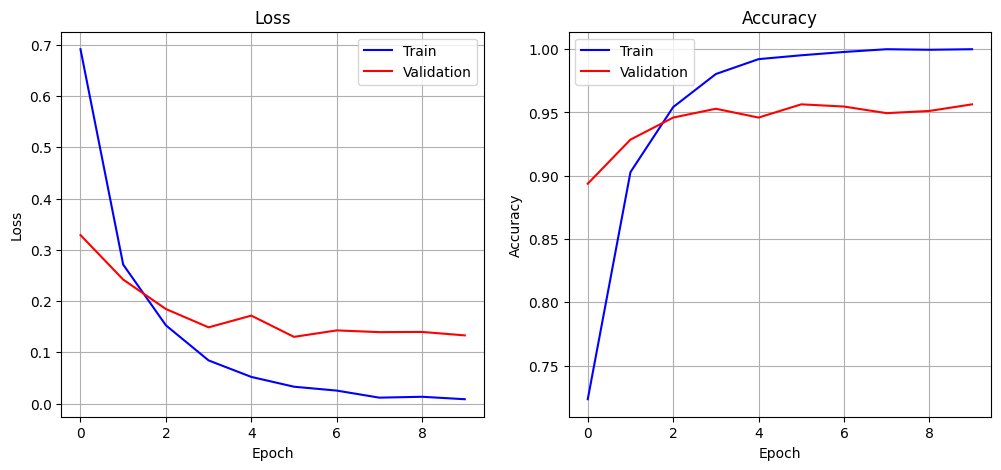

Precision: 0.8370, Recall: 0.7437, F1-Score: 0.7177, Accuracy: 0.7538
Fold 2/5
Epoch 1/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.48it/s, loss=0.374]


Train Loss: 0.7018, Train Acc: 0.7186
Val Loss: 0.3744, Val Acc: 0.8537
Epoch 2/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.88it/s, loss=0.266]


Train Loss: 0.2609, Train Acc: 0.9177
Val Loss: 0.2663, Val Acc: 0.8902
Epoch 3/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.02it/s, loss=0.216] 


Train Loss: 0.1343, Train Acc: 0.9682
Val Loss: 0.2164, Val Acc: 0.9007
Epoch 4/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.23it/s, loss=0.156]


Train Loss: 0.0756, Train Acc: 0.9839
Val Loss: 0.1562, Val Acc: 0.9408
Epoch 5/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.50it/s, loss=0.138]


Train Loss: 0.0398, Train Acc: 0.9965
Val Loss: 0.1385, Val Acc: 0.9460
Epoch 6/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.89it/s, loss=0.144]


Train Loss: 0.0302, Train Acc: 0.9970
Val Loss: 0.1437, Val Acc: 0.9390
Epoch 7/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.33it/s, loss=0.132]


Train Loss: 0.0194, Train Acc: 0.9978
Val Loss: 0.1315, Val Acc: 0.9443
Epoch 8/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.31it/s, loss=0.132]


Train Loss: 0.0144, Train Acc: 1.0000
Val Loss: 0.1316, Val Acc: 0.9443
Epoch 9/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.23it/s, loss=0.131]


Train Loss: 0.0098, Train Acc: 0.9996
Val Loss: 0.1311, Val Acc: 0.9460
Epoch 10/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s, loss=0.125]


Train Loss: 0.0097, Train Acc: 0.9996
Val Loss: 0.1253, Val Acc: 0.9495


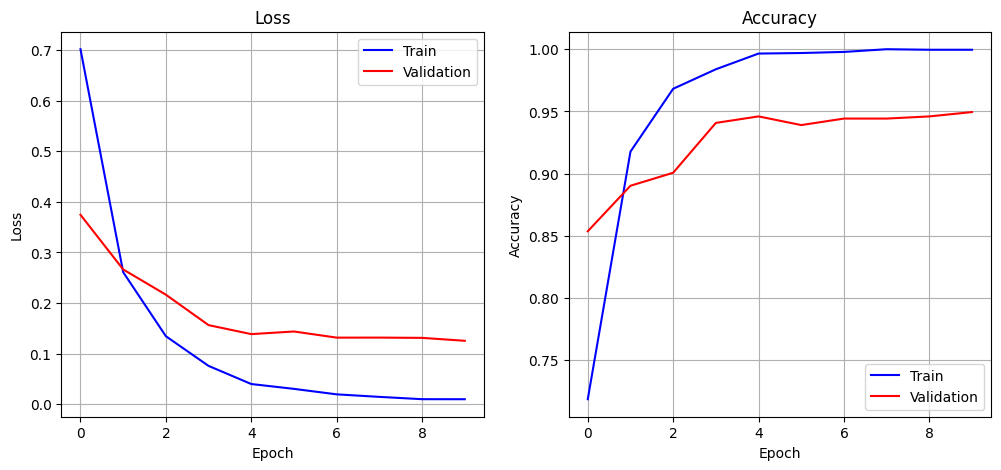

Precision: 0.8360, Recall: 0.7163, F1-Score: 0.6980, Accuracy: 0.7335
Fold 3/5
Epoch 1/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.40it/s, loss=0.343] 


Train Loss: 0.7133, Train Acc: 0.7130
Val Loss: 0.3431, Val Acc: 0.8676
Epoch 2/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.27it/s, loss=0.227] 


Train Loss: 0.2409, Train Acc: 0.9172
Val Loss: 0.2274, Val Acc: 0.9042
Epoch 3/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.92it/s, loss=0.192] 


Train Loss: 0.1234, Train Acc: 0.9691
Val Loss: 0.1922, Val Acc: 0.9268
Epoch 4/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.39it/s, loss=0.164] 


Train Loss: 0.0753, Train Acc: 0.9826
Val Loss: 0.1637, Val Acc: 0.9338
Epoch 5/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.46it/s, loss=0.167] 


Train Loss: 0.0405, Train Acc: 0.9956
Val Loss: 0.1669, Val Acc: 0.9373
Epoch 6/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.84it/s, loss=0.158] 


Train Loss: 0.0290, Train Acc: 0.9965
Val Loss: 0.1581, Val Acc: 0.9408
Epoch 7/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.08it/s, loss=0.15]  


Train Loss: 0.0179, Train Acc: 0.9996
Val Loss: 0.1504, Val Acc: 0.9390
Epoch 8/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.38it/s, loss=0.156] 


Train Loss: 0.0144, Train Acc: 0.9996
Val Loss: 0.1564, Val Acc: 0.9408
Epoch 9/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.45it/s, loss=0.148] 


Train Loss: 0.0105, Train Acc: 1.0000
Val Loss: 0.1480, Val Acc: 0.9390
Epoch 10/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.37it/s, loss=0.154] 


Train Loss: 0.0087, Train Acc: 1.0000
Val Loss: 0.1538, Val Acc: 0.9390


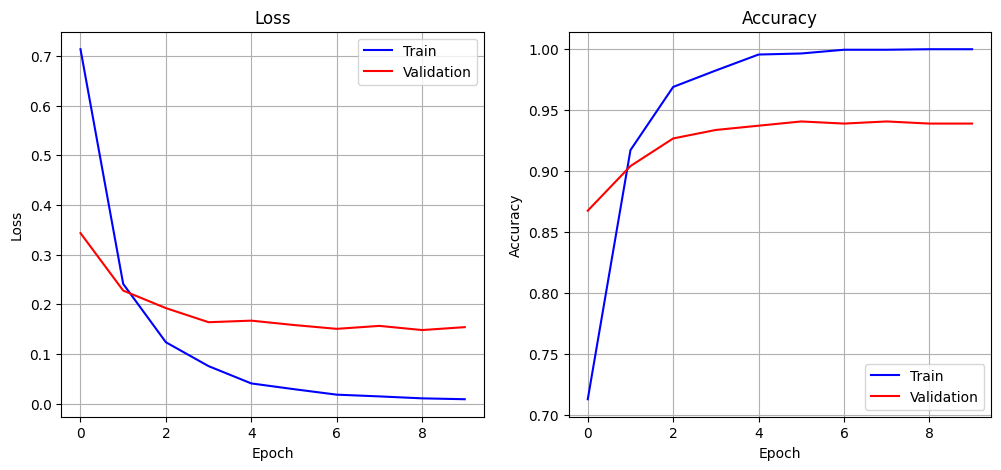

Precision: 0.8342, Recall: 0.7543, F1-Score: 0.7186, Accuracy: 0.7563
Fold 4/5
Epoch 1/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.31it/s, loss=0.363]


Train Loss: 0.7110, Train Acc: 0.7208
Val Loss: 0.3635, Val Acc: 0.8693
Epoch 2/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.70it/s, loss=0.256]


Train Loss: 0.2424, Train Acc: 0.9190
Val Loss: 0.2561, Val Acc: 0.8850
Epoch 3/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.23it/s, loss=0.188] 


Train Loss: 0.1324, Train Acc: 0.9634
Val Loss: 0.1883, Val Acc: 0.9390
Epoch 4/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.37it/s, loss=0.167] 


Train Loss: 0.0711, Train Acc: 0.9861
Val Loss: 0.1671, Val Acc: 0.9373
Epoch 5/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.37it/s, loss=0.138] 


Train Loss: 0.0416, Train Acc: 0.9943
Val Loss: 0.1377, Val Acc: 0.9495
Epoch 6/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s, loss=0.152] 


Train Loss: 0.0250, Train Acc: 0.9978
Val Loss: 0.1521, Val Acc: 0.9443
Epoch 7/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.25it/s, loss=0.143] 


Train Loss: 0.0204, Train Acc: 0.9991
Val Loss: 0.1430, Val Acc: 0.9408
Epoch 8/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.42it/s, loss=0.126] 


Train Loss: 0.0123, Train Acc: 0.9996
Val Loss: 0.1260, Val Acc: 0.9477
Epoch 9/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.80it/s, loss=0.135] 


Train Loss: 0.0123, Train Acc: 1.0000
Val Loss: 0.1352, Val Acc: 0.9460
Epoch 10/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.20it/s, loss=0.134] 


Train Loss: 0.0087, Train Acc: 0.9996
Val Loss: 0.1342, Val Acc: 0.9530


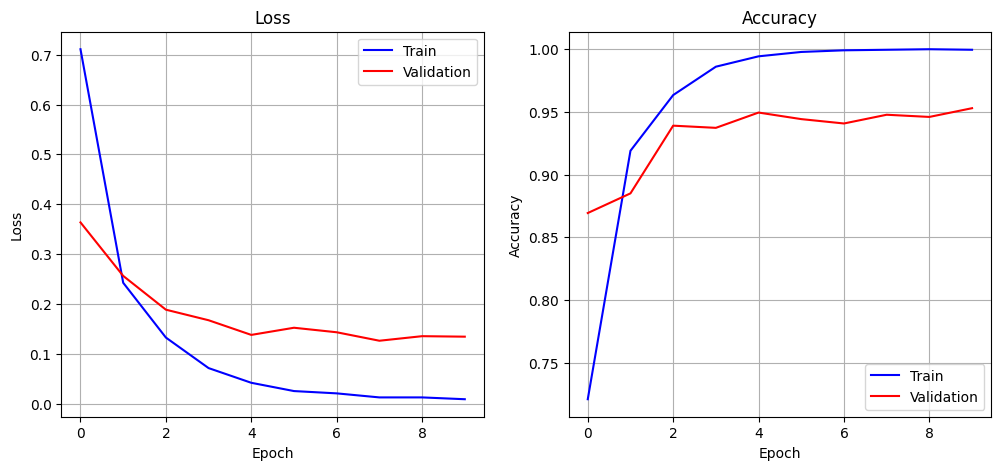

Precision: 0.8297, Recall: 0.7021, F1-Score: 0.6805, Accuracy: 0.7183
Fold 5/5
Epoch 1/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.42it/s, loss=0.404]


Train Loss: 0.6979, Train Acc: 0.7243
Val Loss: 0.4041, Val Acc: 0.8380
Epoch 2/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.53it/s, loss=0.283]


Train Loss: 0.2507, Train Acc: 0.9138
Val Loss: 0.2833, Val Acc: 0.8937
Epoch 3/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.24it/s, loss=0.206]


Train Loss: 0.1242, Train Acc: 0.9656
Val Loss: 0.2059, Val Acc: 0.9268
Epoch 4/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.20it/s, loss=0.197]


Train Loss: 0.0743, Train Acc: 0.9848
Val Loss: 0.1967, Val Acc: 0.9233
Epoch 5/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.32it/s, loss=0.172] 


Train Loss: 0.0483, Train Acc: 0.9909
Val Loss: 0.1721, Val Acc: 0.9373
Epoch 6/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s, loss=0.161] 


Train Loss: 0.0317, Train Acc: 0.9956
Val Loss: 0.1614, Val Acc: 0.9443
Epoch 7/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.38it/s, loss=0.157] 


Train Loss: 0.0197, Train Acc: 0.9991
Val Loss: 0.1573, Val Acc: 0.9512
Epoch 8/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.46it/s, loss=0.143] 


Train Loss: 0.0143, Train Acc: 1.0000
Val Loss: 0.1431, Val Acc: 0.9512
Epoch 9/10


Validation: 100%|██████████| 18/18 [00:03<00:00,  5.86it/s, loss=0.155] 


Train Loss: 0.0104, Train Acc: 0.9996
Val Loss: 0.1554, Val Acc: 0.9477
Epoch 10/10


Validation: 100%|██████████| 18/18 [00:02<00:00,  6.36it/s, loss=0.149] 


Train Loss: 0.0086, Train Acc: 1.0000
Val Loss: 0.1488, Val Acc: 0.9547


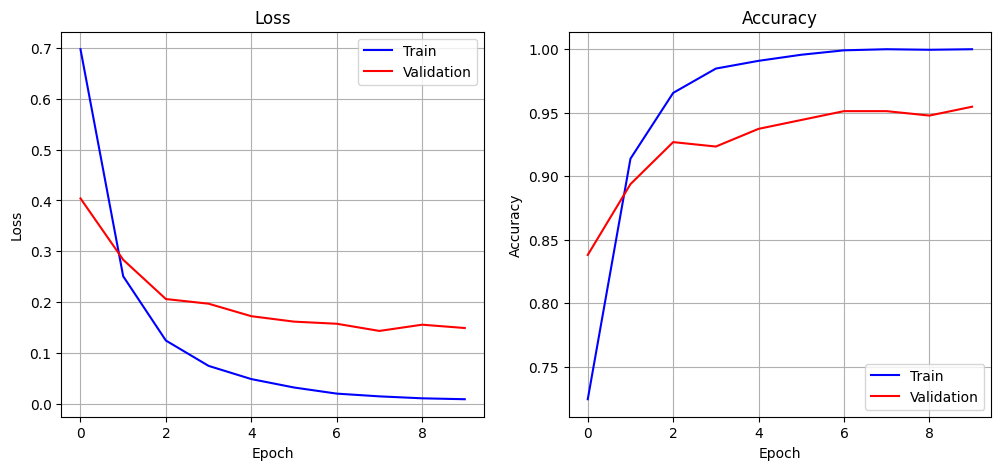

Precision: 0.8298, Recall: 0.7392, F1-Score: 0.7129, Accuracy: 0.7487
Precision: Mean = 0.8333, Std = 0.0031
Recall: Mean = 0.7311, Std = 0.0191
F1-Score: Mean = 0.7055, Std = 0.0145
Accuracy: Mean = 0.7421, Std = 0.0143


In [8]:
k_folds = 5
batch_size = 32
num_epochs = 10
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

skf = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=123)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

results = {"Precision": [], "Recall": [], "F1-Score": [], "Accuracy": []}


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

folds = skf.split(train_ds.image_paths, numeric_targets)


for fold, (train_idx, val_idx) in enumerate(folds):
    print(f"Fold {fold + 1}/{k_folds}")

    train_subset = Subset(train_ds, train_idx)
    val_subset = Subset(train_ds, val_idx)

    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

    # Model, loss, optimizer
    model = models.resnet18(weights="IMAGENET1K_V1")
    model.fc = nn.Linear(model.fc.in_features, 4)
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    #optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

    train_losses, val_losses, train_accs, val_accs = [], [], [], []

    for epoch in range(num_epochs):
        print(f"Epoch {epoch + 1}/{num_epochs}")
        model.train()

        # Train
        running_loss, correct = 0.0, 0
        train_loader_tqdm = tqdm(train_loader, desc="Training", leave=True)

        for images, labels in train_loader_tqdm:
            optimizer.zero_grad()
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            correct += (outputs.argmax(1) == labels).sum().item()
            train_loader_tqdm.set_postfix(loss=running_loss / len(train_loader))

        train_losses.append(running_loss / len(train_loader))
        train_accs.append(correct / len(train_subset))

        # Val
        model.eval()
        val_loss, correct = 0.0, 0
        val_loader_tqdm = tqdm(val_loader, desc="Validation", leave=True)

        with torch.no_grad():
            for images, labels in val_loader_tqdm:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                correct += (outputs.argmax(1) == labels).sum().item()
                val_loader_tqdm.set_postfix(loss=val_loss / len(val_loader))

        val_losses.append(val_loss / len(val_loader))
        val_accs.append(correct / len(val_subset))

        print(f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.4f}")
        print(f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

    # Plot loss and accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.title("Loss")
    plt.plot(train_losses, label="Train", color='b')
    plt.plot(val_losses, label="Validation", color='r')
    plt.legend()
    plt.grid()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    
    plt.subplot(1, 2, 2)
    plt.title("Accuracy")
    plt.plot(train_accs, label="Train", color='b')
    plt.plot(val_accs, label="Validation", color='r')
    plt.legend()
    plt.grid()
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")

    plt.show()


    model.eval()
    y_true, y_pred = [], []
    test_loader_tqdm = tqdm(test_loader, desc="Testing", leave=False)

    with torch.no_grad():
        for images, labels in test_loader_tqdm:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            preds = outputs.argmax(1)
            y_true.extend(labels.cpu().numpy())
            y_pred.extend(preds.cpu().numpy())


    results["Precision"].append(precision_score(y_true, y_pred, average="macro"))
    results["Recall"].append(recall_score(y_true, y_pred, average="macro"))
    results["F1-Score"].append(f1_score(y_true, y_pred, average="macro"))
    results["Accuracy"].append(accuracy_score(y_true, y_pred))

    print(f'Precision: {results["Precision"][-1]:.4f}, Recall: {results["Recall"][-1]:.4f}, F1-Score: {results["F1-Score"][-1]:.4f}, Accuracy: {results["Accuracy"][-1]:.4f}')

for metric in results:
    mean = np.mean(results[metric])
    std = np.std(results[metric])
    print(f"{metric}: Mean = {mean:.4f}, Std = {std:.4f}")

## Task 2

In [8]:
def train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs=10, device="cpu"):

    # Training and validation
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")
        
        # Training loop
        model.train()
        running_loss, correct = 0.0, 0
        with tqdm(train_loader, desc="Training", unit="batch") as pbar:
            for images, labels in pbar:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                correct += (outputs.argmax(1) == labels).sum().item()
                pbar.set_postfix(loss=running_loss / len(train_loader))

        train_losses.append(running_loss / len(train_loader))
        train_accs.append(correct / len(train_loader.dataset))

        print(f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.4f}")

        # Validation loop
        model.eval()
        val_loss, correct = 0.0, 0
        with tqdm(val_loader, desc="Validating", unit="batch") as pbar:
            with torch.no_grad():
                for images, labels in pbar:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    correct += (outputs.argmax(1) == labels).sum().item()
                    pbar.set_postfix(loss=val_loss / len(val_loader))

        val_losses.append(val_loss / len(val_loader))
        val_accs.append(correct / len(val_loader.dataset))

        print(f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

    # Test evaluation
    model.eval()
    y_true, y_pred = [], []
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar:
        with torch.no_grad():
            for images, labels in pbar:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = outputs.argmax(1)
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())

    # Metrics
    precision = precision_score(y_true, y_pred, average="macro")
    recall = recall_score(y_true, y_pred, average="macro")
    f1 = f1_score(y_true, y_pred, average="macro")
    accuracy = accuracy_score(y_true, y_pred)
    return train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy


In [22]:
def plot_accuracies_and_losses(train_losses, val_losses, train_accuracies, val_accuracies, title):

    max_train_accuracy = max(train_accuracies)
    max_val_accuracy = max(val_accuracies)
    max_train_epoch = train_accuracies.index(max_train_accuracy)
    max_val_epoch = val_accuracies.index(max_val_accuracy)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss", color='b')
    plt.plot(val_losses, label="Val Loss", color='r')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curves ({title})")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy", color='b')
    plt.plot(val_accuracies, label="Val Accuracy", color='r')
    plt.scatter(max_train_epoch, max_train_accuracy, color='blue', label=f"Max Train Accuracy: {max_train_accuracy:.4f}", zorder=5)
    plt.scatter(max_val_epoch, max_val_accuracy, color='red', label=f"Max Val Accuracy: {max_val_accuracy:.4f}", zorder=5)

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Curves ({title})")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

### Task 2.1

In [26]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 20
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = next(iter(skf.split(train_ds.image_paths, numeric_targets)))

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

class_weights = [1.0 / class_counts[i] for i in range(len(class_counts))]
class_weights = torch.tensor(class_weights, device=device)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)


Epoch 1/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.38batch/s, loss=0.708]


Train Loss: 0.7076, Train Acc: 0.7178


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.88batch/s, loss=0.298]


Val Loss: 0.2978, Val Acc: 0.9077

Epoch 2/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.70batch/s, loss=0.245] 


Train Loss: 0.2450, Train Acc: 0.9194


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.60batch/s, loss=0.254]


Val Loss: 0.2540, Val Acc: 0.8972

Epoch 3/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.59batch/s, loss=0.142] 


Train Loss: 0.1423, Train Acc: 0.9569


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.79batch/s, loss=0.179]


Val Loss: 0.1793, Val Acc: 0.9425

Epoch 4/20


Training: 100%|██████████| 72/72 [00:14<00:00,  4.85batch/s, loss=0.08]   


Train Loss: 0.0800, Train Acc: 0.9804


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.61batch/s, loss=0.124] 


Val Loss: 0.1241, Val Acc: 0.9460

Epoch 5/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.44batch/s, loss=0.0425] 


Train Loss: 0.0425, Train Acc: 0.9948


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.22batch/s, loss=0.11]  


Val Loss: 0.1102, Val Acc: 0.9564

Epoch 6/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.34batch/s, loss=0.026]  


Train Loss: 0.0260, Train Acc: 0.9970


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.45batch/s, loss=0.105] 


Val Loss: 0.1051, Val Acc: 0.9599

Epoch 7/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.33batch/s, loss=0.0189] 


Train Loss: 0.0189, Train Acc: 0.9983


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.98batch/s, loss=0.108] 


Val Loss: 0.1083, Val Acc: 0.9617

Epoch 8/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.30batch/s, loss=0.0229] 


Train Loss: 0.0229, Train Acc: 0.9978


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.48batch/s, loss=0.108] 


Val Loss: 0.1081, Val Acc: 0.9652

Epoch 9/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.80batch/s, loss=0.0106] 


Train Loss: 0.0106, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.70batch/s, loss=0.102] 


Val Loss: 0.1021, Val Acc: 0.9634

Epoch 10/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.38batch/s, loss=0.0112] 


Train Loss: 0.0112, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.18batch/s, loss=0.108] 


Val Loss: 0.1078, Val Acc: 0.9617

Epoch 11/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.39batch/s, loss=0.00687]


Train Loss: 0.0069, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.32batch/s, loss=0.0997]


Val Loss: 0.0997, Val Acc: 0.9634

Epoch 12/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.21batch/s, loss=0.00628] 


Train Loss: 0.0063, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.21batch/s, loss=0.107] 


Val Loss: 0.1069, Val Acc: 0.9634

Epoch 13/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.59batch/s, loss=0.00538]


Train Loss: 0.0054, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.67batch/s, loss=0.102] 


Val Loss: 0.1016, Val Acc: 0.9669

Epoch 14/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.46batch/s, loss=0.00768]


Train Loss: 0.0077, Train Acc: 0.9987


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.51batch/s, loss=0.0935]


Val Loss: 0.0935, Val Acc: 0.9634

Epoch 15/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.46batch/s, loss=0.00433] 


Train Loss: 0.0043, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  7.15batch/s, loss=0.11]  


Val Loss: 0.1102, Val Acc: 0.9652

Epoch 16/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.77batch/s, loss=0.00425] 


Train Loss: 0.0043, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.46batch/s, loss=0.105] 


Val Loss: 0.1052, Val Acc: 0.9669

Epoch 17/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.42batch/s, loss=0.00372] 


Train Loss: 0.0037, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.67batch/s, loss=0.0989]


Val Loss: 0.0989, Val Acc: 0.9652

Epoch 18/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.58batch/s, loss=0.00444] 


Train Loss: 0.0044, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.35batch/s, loss=0.115] 


Val Loss: 0.1148, Val Acc: 0.9617

Epoch 19/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.38batch/s, loss=0.00443] 


Train Loss: 0.0044, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.75batch/s, loss=0.104] 


Val Loss: 0.1043, Val Acc: 0.9669

Epoch 20/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.22batch/s, loss=0.00399]


Train Loss: 0.0040, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.16batch/s, loss=0.109] 


Val Loss: 0.1094, Val Acc: 0.9617


Testing: 100%|██████████| 13/13 [00:01<00:00,  6.89batch/s]


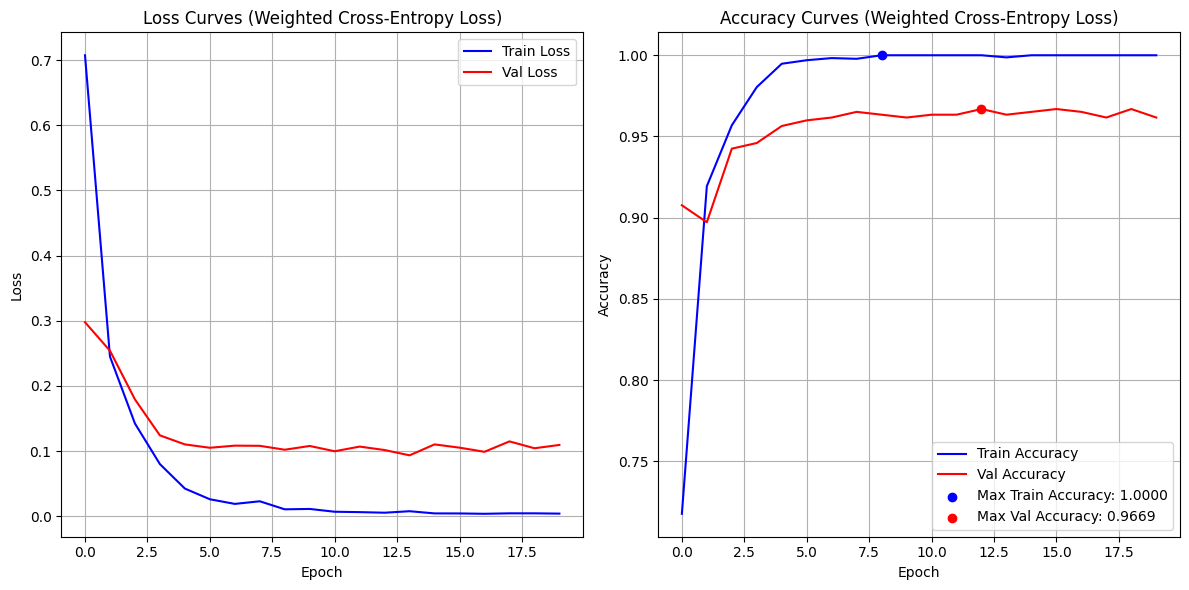

Precision: 0.8468, Recall: 0.7682, F1-Score: 0.7515, Accuracy: 0.7766


In [27]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Weighted Cross-Entropy Loss")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

### Task 2.2

In [47]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 20
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

augmentation = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=augmentation)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = next(iter(skf.split(train_ds.image_paths, numeric_targets)))

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

subset_targets = [numeric_targets[i] for i in train_idx]
class_counts = Counter(subset_targets)
class_weights = {label: 1.0 / count for label, count in class_counts.items()}
weights = [class_weights[numeric_targets[i]] for i in train_idx]

sampler = WeightedRandomSampler(weights, num_samples=len(train_idx))

train_loader = DataLoader(train_subset, sampler=sampler, batch_size=batch_size)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.90batch/s, loss=0.757]


Train Loss: 0.7571, Train Acc: 0.7078


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.46batch/s, loss=0.396]


Val Loss: 0.3955, Val Acc: 0.8763

Epoch 2/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.87batch/s, loss=0.328] 


Train Loss: 0.3283, Train Acc: 0.8876


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.00batch/s, loss=0.413]


Val Loss: 0.4130, Val Acc: 0.8467

Epoch 3/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.87batch/s, loss=0.26]  


Train Loss: 0.2604, Train Acc: 0.9020


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.50batch/s, loss=0.239] 


Val Loss: 0.2388, Val Acc: 0.9146

Epoch 4/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.08batch/s, loss=0.146] 


Train Loss: 0.1464, Train Acc: 0.9486


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.42batch/s, loss=0.151] 


Val Loss: 0.1511, Val Acc: 0.9443

Epoch 5/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.89batch/s, loss=0.159] 


Train Loss: 0.1592, Train Acc: 0.9425


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.47batch/s, loss=0.168] 


Val Loss: 0.1682, Val Acc: 0.9216

Epoch 6/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.98batch/s, loss=0.121] 


Train Loss: 0.1205, Train Acc: 0.9604


Validating: 100%|██████████| 18/18 [00:03<00:00,  4.99batch/s, loss=0.153] 


Val Loss: 0.1527, Val Acc: 0.9477

Epoch 7/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.04batch/s, loss=0.0981] 


Train Loss: 0.0981, Train Acc: 0.9691


Validating: 100%|██████████| 18/18 [00:03<00:00,  4.78batch/s, loss=0.129]  


Val Loss: 0.1287, Val Acc: 0.9564

Epoch 8/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.96batch/s, loss=0.0787]


Train Loss: 0.0787, Train Acc: 0.9743


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.32batch/s, loss=0.103] 


Val Loss: 0.1033, Val Acc: 0.9599

Epoch 9/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.13batch/s, loss=0.0826] 


Train Loss: 0.0826, Train Acc: 0.9739


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.28batch/s, loss=0.113]  


Val Loss: 0.1129, Val Acc: 0.9564

Epoch 10/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.79batch/s, loss=0.0681] 


Train Loss: 0.0681, Train Acc: 0.9791


Validating: 100%|██████████| 18/18 [00:03<00:00,  4.68batch/s, loss=0.103]  


Val Loss: 0.1032, Val Acc: 0.9669

Epoch 11/20


Training: 100%|██████████| 72/72 [00:19<00:00,  3.75batch/s, loss=0.0645] 


Train Loss: 0.0645, Train Acc: 0.9817


Validating: 100%|██████████| 18/18 [00:04<00:00,  4.30batch/s, loss=0.113]  


Val Loss: 0.1131, Val Acc: 0.9686

Epoch 12/20


Training: 100%|██████████| 72/72 [00:20<00:00,  3.44batch/s, loss=0.0449] 


Train Loss: 0.0449, Train Acc: 0.9865


Validating: 100%|██████████| 18/18 [00:03<00:00,  4.77batch/s, loss=0.1]   


Val Loss: 0.1003, Val Acc: 0.9721

Epoch 13/20


Training: 100%|██████████| 72/72 [00:19<00:00,  3.73batch/s, loss=0.0404] 


Train Loss: 0.0404, Train Acc: 0.9887


Validating: 100%|██████████| 18/18 [00:03<00:00,  4.76batch/s, loss=0.0936] 


Val Loss: 0.0936, Val Acc: 0.9721

Epoch 14/20


Training: 100%|██████████| 72/72 [00:19<00:00,  3.71batch/s, loss=0.0421] 


Train Loss: 0.0421, Train Acc: 0.9882


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.12batch/s, loss=0.0867] 


Val Loss: 0.0867, Val Acc: 0.9739

Epoch 15/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.93batch/s, loss=0.0309] 


Train Loss: 0.0309, Train Acc: 0.9930


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.50batch/s, loss=0.101]  


Val Loss: 0.1005, Val Acc: 0.9634

Epoch 16/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.23batch/s, loss=0.0321] 


Train Loss: 0.0321, Train Acc: 0.9909


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.01batch/s, loss=0.0784] 


Val Loss: 0.0784, Val Acc: 0.9756

Epoch 17/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.96batch/s, loss=0.0257] 


Train Loss: 0.0257, Train Acc: 0.9952


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.02batch/s, loss=0.104] 


Val Loss: 0.1039, Val Acc: 0.9617

Epoch 18/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.84batch/s, loss=0.0298] 


Train Loss: 0.0298, Train Acc: 0.9909


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.09batch/s, loss=0.0895] 


Val Loss: 0.0895, Val Acc: 0.9704

Epoch 19/20


Training: 100%|██████████| 72/72 [00:19<00:00,  3.79batch/s, loss=0.0342] 


Train Loss: 0.0342, Train Acc: 0.9891


Validating: 100%|██████████| 18/18 [00:04<00:00,  3.88batch/s, loss=0.129]  


Val Loss: 0.1293, Val Acc: 0.9617

Epoch 20/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.81batch/s, loss=0.0264] 


Train Loss: 0.0264, Train Acc: 0.9930


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.13batch/s, loss=0.0915] 


Val Loss: 0.0915, Val Acc: 0.9721


Testing: 100%|██████████| 13/13 [00:01<00:00,  7.29batch/s]


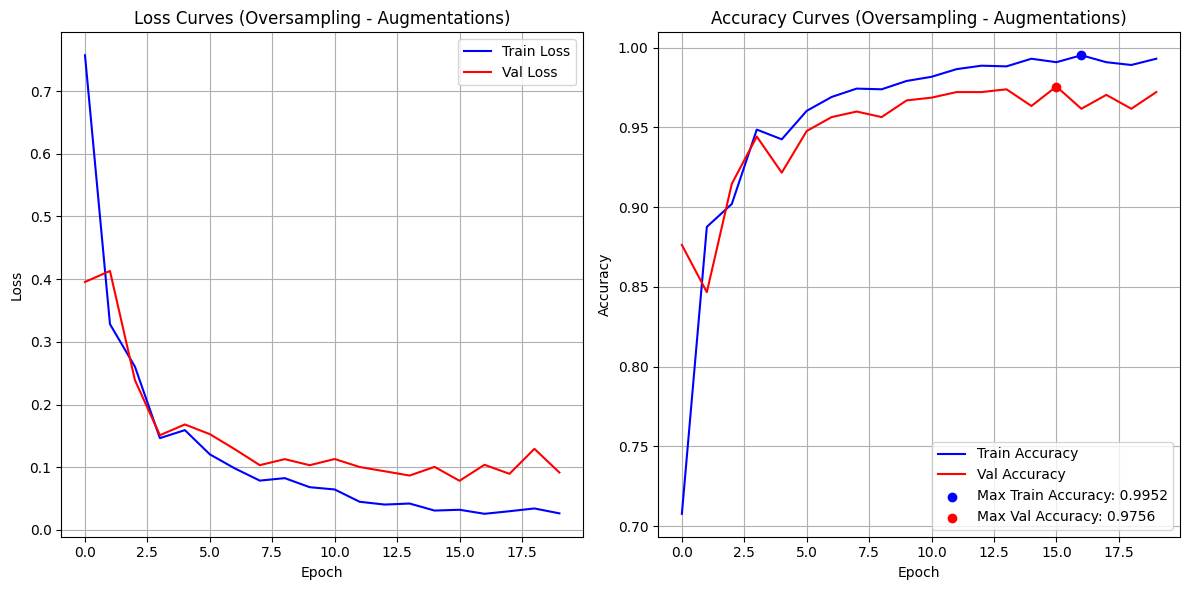

Precision: 0.8448, Recall: 0.7711, F1-Score: 0.7520, Accuracy: 0.7792


In [48]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Oversampling - Augmentations")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

### Task 2.3

In [52]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 20
learning_rate = 0.001

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    #transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = next(iter(skf.split(train_ds.image_paths, numeric_targets)))

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

subset_targets = [numeric_targets[i] for i in train_idx]
class_counts = Counter(subset_targets)
class_weights = {label: 1.0 / count for label, count in class_counts.items()}
weights = [class_weights[numeric_targets[i]] for i in train_idx]

sampler = WeightedRandomSampler(weights, num_samples=len(train_idx))

train_loader = DataLoader(train_subset, sampler=sampler, batch_size=batch_size)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.52batch/s, loss=0.638]


Train Loss: 0.6379, Train Acc: 0.7744


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.70batch/s, loss=0.308]


Val Loss: 0.3081, Val Acc: 0.9077

Epoch 2/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.67batch/s, loss=0.208] 


Train Loss: 0.2076, Train Acc: 0.9416


Validating: 100%|██████████| 18/18 [00:02<00:00,  7.21batch/s, loss=0.189] 


Val Loss: 0.1886, Val Acc: 0.9303

Epoch 3/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.57batch/s, loss=0.124]  


Train Loss: 0.1235, Train Acc: 0.9682


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.37batch/s, loss=0.154] 


Val Loss: 0.1545, Val Acc: 0.9512

Epoch 4/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.66batch/s, loss=0.0813]


Train Loss: 0.0813, Train Acc: 0.9839


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.82batch/s, loss=0.123] 


Val Loss: 0.1227, Val Acc: 0.9617

Epoch 5/20


Training: 100%|██████████| 72/72 [00:14<00:00,  4.93batch/s, loss=0.0482] 


Train Loss: 0.0482, Train Acc: 0.9909


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.47batch/s, loss=0.153] 


Val Loss: 0.1526, Val Acc: 0.9495

Epoch 6/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.39batch/s, loss=0.0331] 


Train Loss: 0.0331, Train Acc: 0.9956


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.99batch/s, loss=0.116] 


Val Loss: 0.1158, Val Acc: 0.9564

Epoch 7/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.57batch/s, loss=0.0262] 


Train Loss: 0.0262, Train Acc: 0.9965


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.70batch/s, loss=0.117] 


Val Loss: 0.1168, Val Acc: 0.9599

Epoch 8/20


Training: 100%|██████████| 72/72 [00:14<00:00,  4.89batch/s, loss=0.0159] 


Train Loss: 0.0159, Train Acc: 0.9987


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.39batch/s, loss=0.103] 


Val Loss: 0.1029, Val Acc: 0.9669

Epoch 9/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.50batch/s, loss=0.0144] 


Train Loss: 0.0144, Train Acc: 0.9991


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.65batch/s, loss=0.106] 


Val Loss: 0.1063, Val Acc: 0.9634

Epoch 10/20


Training: 100%|██████████| 72/72 [00:14<00:00,  4.80batch/s, loss=0.0107] 


Train Loss: 0.0107, Train Acc: 0.9996


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.59batch/s, loss=0.11]  


Val Loss: 0.1103, Val Acc: 0.9634

Epoch 11/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.61batch/s, loss=0.0143]  


Train Loss: 0.0143, Train Acc: 0.9983


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.44batch/s, loss=0.125]


Val Loss: 0.1247, Val Acc: 0.9634

Epoch 12/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.73batch/s, loss=0.00809]


Train Loss: 0.0081, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.28batch/s, loss=0.103] 


Val Loss: 0.1031, Val Acc: 0.9686

Epoch 13/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.36batch/s, loss=0.00716]


Train Loss: 0.0072, Train Acc: 0.9996


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.37batch/s, loss=0.105] 


Val Loss: 0.1046, Val Acc: 0.9634

Epoch 14/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.69batch/s, loss=0.00737] 


Train Loss: 0.0074, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.41batch/s, loss=0.107] 


Val Loss: 0.1069, Val Acc: 0.9652

Epoch 15/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.68batch/s, loss=0.00535] 


Train Loss: 0.0054, Train Acc: 0.9996


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.30batch/s, loss=0.11]  


Val Loss: 0.1097, Val Acc: 0.9669

Epoch 16/20


Training: 100%|██████████| 72/72 [00:14<00:00,  4.93batch/s, loss=0.00467] 


Train Loss: 0.0047, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  7.27batch/s, loss=0.109] 


Val Loss: 0.1090, Val Acc: 0.9669

Epoch 17/20


Training: 100%|██████████| 72/72 [00:14<00:00,  4.94batch/s, loss=0.00489] 


Train Loss: 0.0049, Train Acc: 0.9996


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.93batch/s, loss=0.116]  


Val Loss: 0.1164, Val Acc: 0.9599

Epoch 18/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.48batch/s, loss=0.00367] 


Train Loss: 0.0037, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.47batch/s, loss=0.105]  


Val Loss: 0.1055, Val Acc: 0.9634

Epoch 19/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.60batch/s, loss=0.00381] 


Train Loss: 0.0038, Train Acc: 0.9996


Validating: 100%|██████████| 18/18 [00:02<00:00,  7.17batch/s, loss=0.108]  


Val Loss: 0.1081, Val Acc: 0.9669

Epoch 20/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.36batch/s, loss=0.00245] 


Train Loss: 0.0024, Train Acc: 1.0000


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.39batch/s, loss=0.104]  


Val Loss: 0.1038, Val Acc: 0.9599


Testing: 100%|██████████| 13/13 [00:01<00:00,  7.34batch/s]


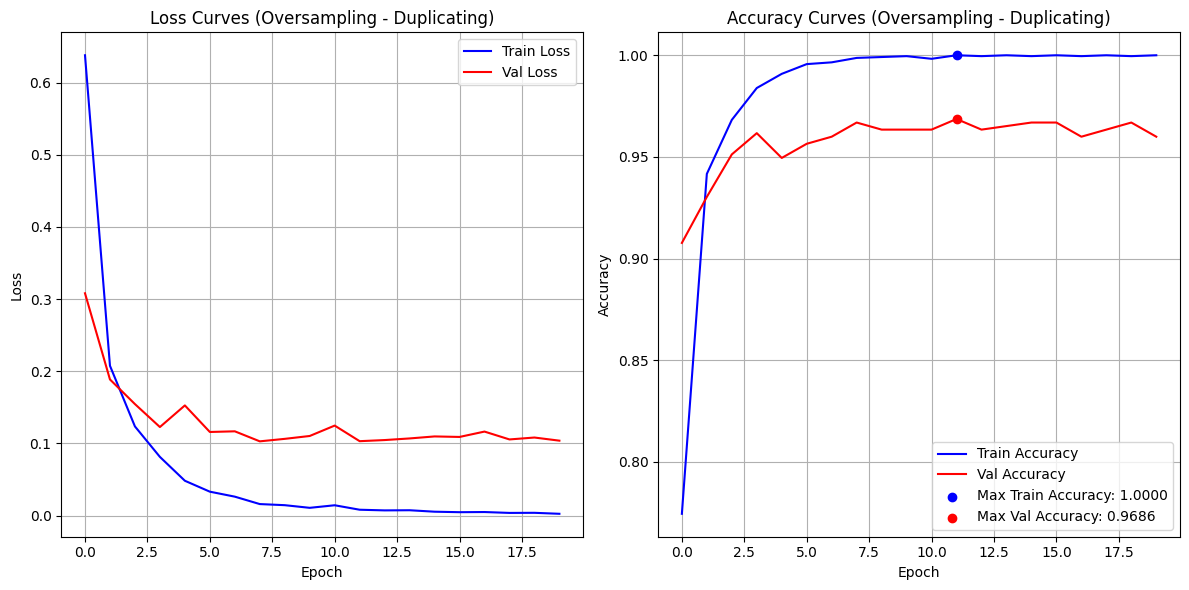

Precision: 0.8384, Recall: 0.7547, F1-Score: 0.7242, Accuracy: 0.7614


In [53]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Oversampling - Duplicating")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

## Task 3

In [69]:
folds = list(skf.split(train_ds.image_paths, numeric_targets))

### Task 3.1


In [76]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 10
learning_rate = 0.001

basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomVerticalFlip(p=0.6),
    transforms.RandomHorizontalFlip(p=0.6),
    transforms.RandomRotation(degrees=15),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=basic_transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = folds[0]

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/10


Training: 100%|██████████| 72/72 [00:17<00:00,  4.23batch/s, loss=0.835]


Train Loss: 0.8345, Train Acc: 0.6564


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.99batch/s, loss=0.418]


Val Loss: 0.4177, Val Acc: 0.8467

Epoch 2/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.34batch/s, loss=0.384] 


Train Loss: 0.3842, Train Acc: 0.8598


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.09batch/s, loss=0.285]


Val Loss: 0.2853, Val Acc: 0.8972

Epoch 3/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.51batch/s, loss=0.266] 


Train Loss: 0.2659, Train Acc: 0.9042


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.90batch/s, loss=0.209]


Val Loss: 0.2088, Val Acc: 0.9251

Epoch 4/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.35batch/s, loss=0.222] 


Train Loss: 0.2222, Train Acc: 0.9181


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.67batch/s, loss=0.198] 


Val Loss: 0.1980, Val Acc: 0.9251

Epoch 5/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.52batch/s, loss=0.179] 


Train Loss: 0.1790, Train Acc: 0.9351


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.85batch/s, loss=0.14]  


Val Loss: 0.1398, Val Acc: 0.9495

Epoch 6/10


Training: 100%|██████████| 72/72 [00:14<00:00,  5.06batch/s, loss=0.152] 


Train Loss: 0.1519, Train Acc: 0.9451


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.91batch/s, loss=0.16]  


Val Loss: 0.1602, Val Acc: 0.9495

Epoch 7/10


Training: 100%|██████████| 72/72 [00:14<00:00,  5.00batch/s, loss=0.12]  


Train Loss: 0.1202, Train Acc: 0.9578


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.61batch/s, loss=0.145]  


Val Loss: 0.1452, Val Acc: 0.9477

Epoch 8/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.64batch/s, loss=0.125]  


Train Loss: 0.1253, Train Acc: 0.9582


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.60batch/s, loss=0.164] 


Val Loss: 0.1640, Val Acc: 0.9373

Epoch 9/10


Training: 100%|██████████| 72/72 [00:14<00:00,  4.81batch/s, loss=0.0982]


Train Loss: 0.0982, Train Acc: 0.9695


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.74batch/s, loss=0.177] 


Val Loss: 0.1774, Val Acc: 0.9408

Epoch 10/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.42batch/s, loss=0.0934] 


Train Loss: 0.0934, Train Acc: 0.9713


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.03batch/s, loss=0.118] 


Val Loss: 0.1181, Val Acc: 0.9477


Testing: 100%|██████████| 13/13 [00:01<00:00,  7.52batch/s]


In [71]:
def calculate_auc(model, test_loader, device):
    model.eval()
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            probabilities = F.softmax(outputs, dim=1)

            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probabilities.cpu().numpy())


    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)

    num_classes = all_probs.shape[1]
    auc_scores = []
    for class_idx in range(num_classes):
        class_labels = (all_labels == class_idx).astype(int)
        auc = roc_auc_score(class_labels, all_probs[:, class_idx])
        auc_scores.append(auc)

    # Compute average AUC
    macro_auc = np.mean(auc_scores)
    return auc_scores, macro_auc

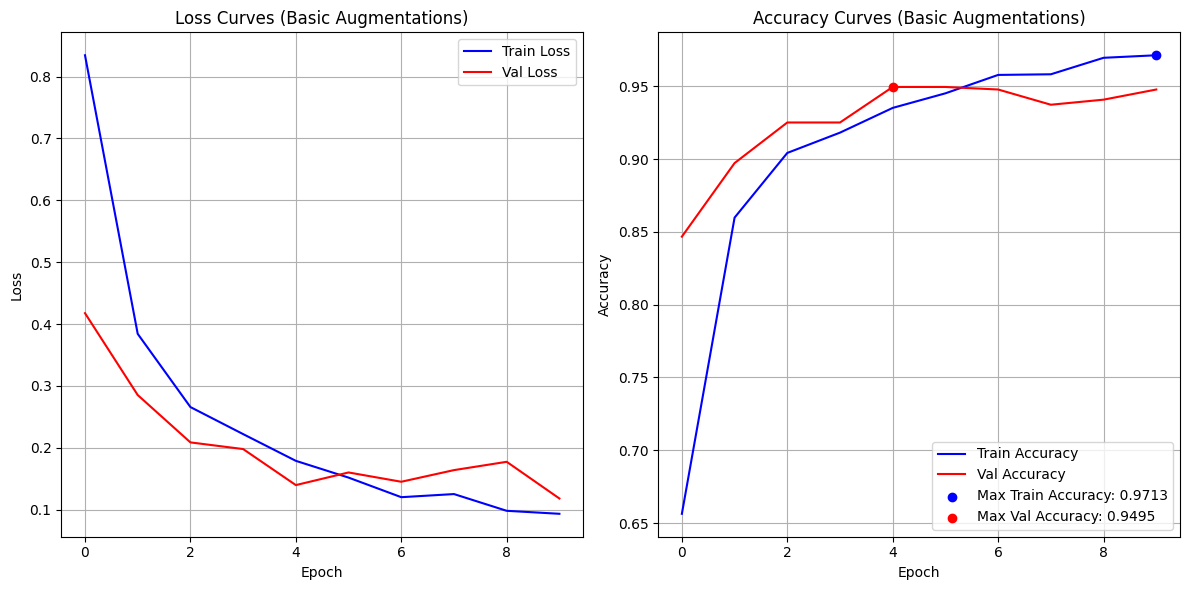

Precision: 0.8179, Recall: 0.7281, F1-Score: 0.7033, Accuracy: 0.7386
AUC Scores per class: 0.7888, 0.9501, 0.9623, 0.9375
Macro-Average AUC: 0.9097


In [77]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Basic Augmentations")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

auc_scores, macro_auc = calculate_auc(model, test_loader, device)
print(f"AUC Scores per class: {auc_scores[0]:.4f}, {auc_scores[1]:.4f}, {auc_scores[2]:.4f}, {auc_scores[3]:.4f}")
print(f"Macro-Average AUC: {macro_auc:.4f}")

### Task 3.2

In [81]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 10
learning_rate = 0.001

intensity_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.5),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=basic_transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = folds[1]

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.36batch/s, loss=0.841]


Train Loss: 0.8412, Train Acc: 0.6429


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.37batch/s, loss=0.521]


Val Loss: 0.5214, Val Acc: 0.7909

Epoch 2/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.36batch/s, loss=0.379] 


Train Loss: 0.3786, Train Acc: 0.8576


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.38batch/s, loss=0.343]


Val Loss: 0.3433, Val Acc: 0.8711

Epoch 3/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.40batch/s, loss=0.301] 


Train Loss: 0.3012, Train Acc: 0.8824


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.05batch/s, loss=0.259]


Val Loss: 0.2592, Val Acc: 0.8885

Epoch 4/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.45batch/s, loss=0.213] 


Train Loss: 0.2130, Train Acc: 0.9242


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.87batch/s, loss=0.211]


Val Loss: 0.2108, Val Acc: 0.9111

Epoch 5/10


Training: 100%|██████████| 72/72 [00:17<00:00,  4.19batch/s, loss=0.192] 


Train Loss: 0.1921, Train Acc: 0.9342


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.81batch/s, loss=0.211]


Val Loss: 0.2112, Val Acc: 0.9216

Epoch 6/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.46batch/s, loss=0.136]  


Train Loss: 0.1359, Train Acc: 0.9534


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.04batch/s, loss=0.197] 


Val Loss: 0.1969, Val Acc: 0.9373

Epoch 7/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.34batch/s, loss=0.116] 


Train Loss: 0.1161, Train Acc: 0.9617


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.43batch/s, loss=0.148] 


Val Loss: 0.1479, Val Acc: 0.9530

Epoch 8/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.24batch/s, loss=0.111] 


Train Loss: 0.1105, Train Acc: 0.9586


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.57batch/s, loss=0.181] 


Val Loss: 0.1810, Val Acc: 0.9303

Epoch 9/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.47batch/s, loss=0.0937]


Train Loss: 0.0937, Train Acc: 0.9678


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.31batch/s, loss=0.154]


Val Loss: 0.1544, Val Acc: 0.9443

Epoch 10/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.27batch/s, loss=0.0804] 


Train Loss: 0.0804, Train Acc: 0.9769


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.59batch/s, loss=0.102] 


Val Loss: 0.1022, Val Acc: 0.9652


Testing: 100%|██████████| 13/13 [00:01<00:00,  7.97batch/s]


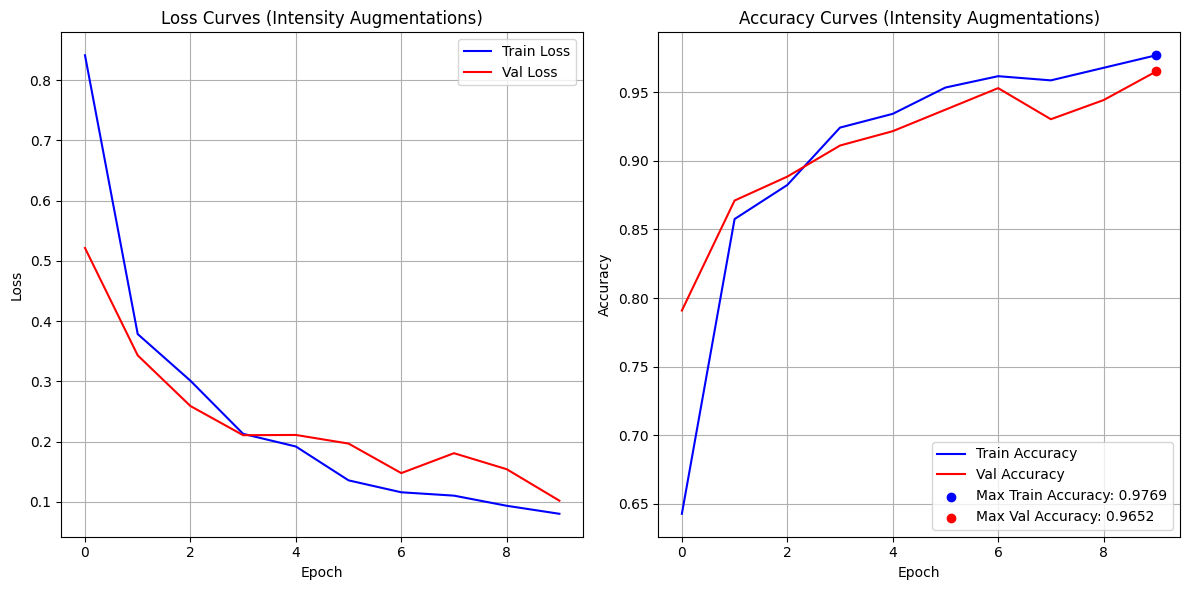

Precision: 0.8020, Recall: 0.6636, F1-Score: 0.6455, Accuracy: 0.6853
AUC Scores per class: 0.7928, 0.9499, 0.9696, 0.9790
Macro-Average AUC: 0.9228


In [82]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Intensity Augmentations")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

auc_scores, macro_auc = calculate_auc(model, test_loader, device)
print(f"AUC Scores per class: {auc_scores[0]:.4f}, {auc_scores[1]:.4f}, {auc_scores[2]:.4f}, {auc_scores[3]:.4f}")
print(f"Macro-Average AUC: {macro_auc:.4f}")

### Task 3.3

In [84]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 10
learning_rate = 0.001

distort_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),
    transforms.RandomAffine(degrees=15),
    transforms.RandomResizedCrop(224, scale=(0.8, 1.0)),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=basic_transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = folds[2]

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/10


Training: 100%|██████████| 72/72 [00:17<00:00,  4.19batch/s, loss=0.841]


Train Loss: 0.8409, Train Acc: 0.6568


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.36batch/s, loss=0.485]


Val Loss: 0.4850, Val Acc: 0.7997

Epoch 2/10


Training: 100%|██████████| 72/72 [00:17<00:00,  4.18batch/s, loss=0.403] 


Train Loss: 0.4029, Train Acc: 0.8524


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.87batch/s, loss=0.296]


Val Loss: 0.2964, Val Acc: 0.8885

Epoch 3/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.52batch/s, loss=0.28]  


Train Loss: 0.2799, Train Acc: 0.9003


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.68batch/s, loss=0.2]  


Val Loss: 0.1997, Val Acc: 0.9303

Epoch 4/10


Training: 100%|██████████| 72/72 [00:14<00:00,  4.90batch/s, loss=0.216] 


Train Loss: 0.2160, Train Acc: 0.9216


Validating: 100%|██████████| 18/18 [00:02<00:00,  7.00batch/s, loss=0.181] 


Val Loss: 0.1810, Val Acc: 0.9408

Epoch 5/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.46batch/s, loss=0.168] 


Train Loss: 0.1685, Train Acc: 0.9443


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.41batch/s, loss=0.177] 


Val Loss: 0.1767, Val Acc: 0.9425

Epoch 6/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.33batch/s, loss=0.123] 


Train Loss: 0.1232, Train Acc: 0.9604


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.97batch/s, loss=0.138] 


Val Loss: 0.1382, Val Acc: 0.9564

Epoch 7/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.40batch/s, loss=0.103] 


Train Loss: 0.1033, Train Acc: 0.9678


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.00batch/s, loss=0.17]  


Val Loss: 0.1701, Val Acc: 0.9495

Epoch 8/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.45batch/s, loss=0.0959] 


Train Loss: 0.0959, Train Acc: 0.9699


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.21batch/s, loss=0.155] 


Val Loss: 0.1554, Val Acc: 0.9408

Epoch 9/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.26batch/s, loss=0.0997]


Train Loss: 0.0997, Train Acc: 0.9691


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.14batch/s, loss=0.162] 


Val Loss: 0.1617, Val Acc: 0.9408

Epoch 10/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.29batch/s, loss=0.0879] 


Train Loss: 0.0879, Train Acc: 0.9691


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.00batch/s, loss=0.125]  


Val Loss: 0.1250, Val Acc: 0.9547


Testing: 100%|██████████| 13/13 [00:01<00:00,  7.26batch/s]


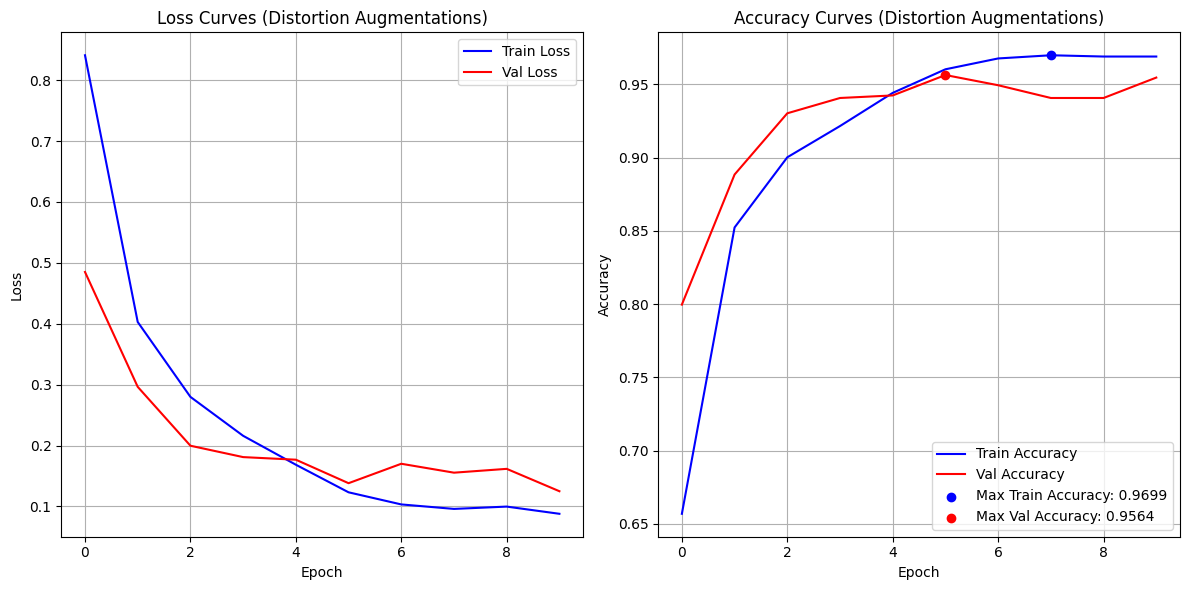

Precision: 0.8178, Recall: 0.6946, F1-Score: 0.6793, Accuracy: 0.7157
AUC Scores per class: 0.7472, 0.9469, 0.9676, 0.9673
Macro-Average AUC: 0.9073


In [85]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Distortion Augmentations")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

auc_scores, macro_auc = calculate_auc(model, test_loader, device)
print(f"AUC Scores per class: {auc_scores[0]:.4f}, {auc_scores[1]:.4f}, {auc_scores[2]:.4f}, {auc_scores[3]:.4f}")
print(f"Macro-Average AUC: {macro_auc:.4f}")

### Task 3.4

In [86]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 10
learning_rate = 0.001

blur_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.GaussianBlur(kernel_size=5),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=basic_transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = folds[3]

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.28batch/s, loss=0.795]


Train Loss: 0.7950, Train Acc: 0.6633


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.17batch/s, loss=0.67] 


Val Loss: 0.6705, Val Acc: 0.7230

Epoch 2/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.55batch/s, loss=0.37]  


Train Loss: 0.3700, Train Acc: 0.8654


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.72batch/s, loss=0.313]


Val Loss: 0.3134, Val Acc: 0.8885

Epoch 3/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.59batch/s, loss=0.265] 


Train Loss: 0.2652, Train Acc: 0.9046


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.43batch/s, loss=0.431]


Val Loss: 0.4307, Val Acc: 0.8223

Epoch 4/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.54batch/s, loss=0.207] 


Train Loss: 0.2071, Train Acc: 0.9229


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.46batch/s, loss=0.305]


Val Loss: 0.3048, Val Acc: 0.8920

Epoch 5/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.49batch/s, loss=0.174] 


Train Loss: 0.1742, Train Acc: 0.9351


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.60batch/s, loss=0.219]


Val Loss: 0.2194, Val Acc: 0.9216

Epoch 6/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.54batch/s, loss=0.141] 


Train Loss: 0.1409, Train Acc: 0.9521


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.65batch/s, loss=0.244]


Val Loss: 0.2445, Val Acc: 0.8990

Epoch 7/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.45batch/s, loss=0.119]  


Train Loss: 0.1186, Train Acc: 0.9617


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.10batch/s, loss=0.172] 


Val Loss: 0.1717, Val Acc: 0.9425

Epoch 8/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.76batch/s, loss=0.123] 


Train Loss: 0.1227, Train Acc: 0.9578


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.65batch/s, loss=0.148] 


Val Loss: 0.1484, Val Acc: 0.9599

Epoch 9/10


Training: 100%|██████████| 72/72 [00:14<00:00,  4.80batch/s, loss=0.104] 


Train Loss: 0.1041, Train Acc: 0.9686


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.83batch/s, loss=0.184] 


Val Loss: 0.1841, Val Acc: 0.9373

Epoch 10/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.69batch/s, loss=0.0807] 


Train Loss: 0.0807, Train Acc: 0.9760


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.78batch/s, loss=0.174]


Val Loss: 0.1740, Val Acc: 0.9338


Testing: 100%|██████████| 13/13 [00:01<00:00,  8.01batch/s]


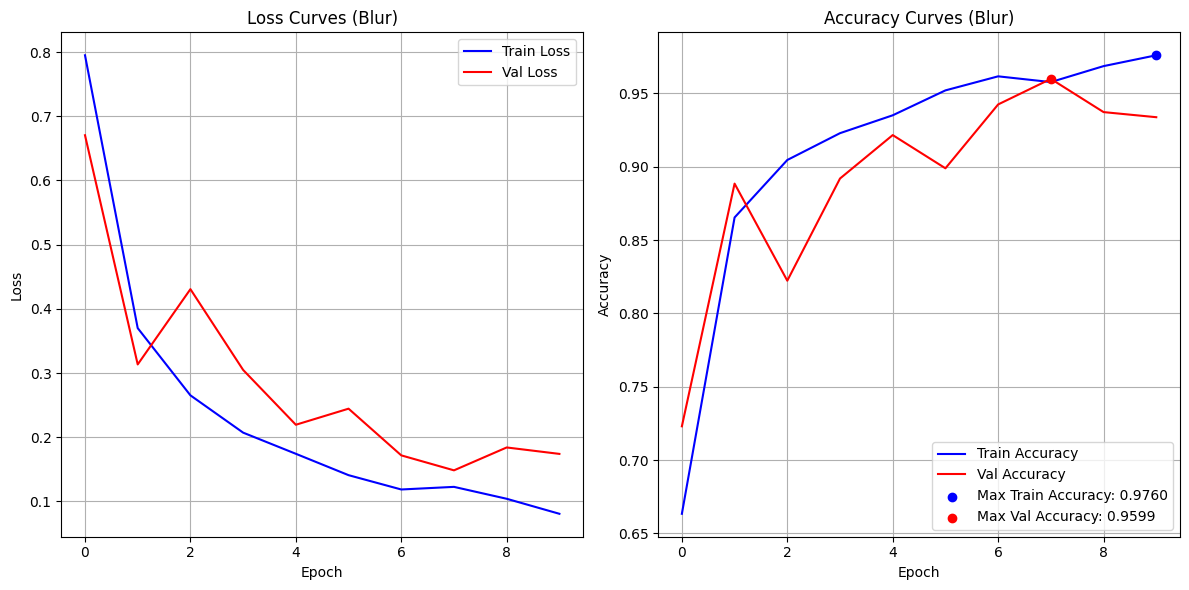

Precision: 0.7889, Recall: 0.6732, F1-Score: 0.6472, Accuracy: 0.6929
AUC Scores per class: 0.8039, 0.9521, 0.9533, 0.8881
Macro-Average AUC: 0.8994


In [87]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Blur")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

auc_scores, macro_auc = calculate_auc(model, test_loader, device)
print(f"AUC Scores per class: {auc_scores[0]:.4f}, {auc_scores[1]:.4f}, {auc_scores[2]:.4f}, {auc_scores[3]:.4f}")
print(f"Macro-Average AUC: {macro_auc:.4f}")

### Task 3.5

In [88]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 10
learning_rate = 0.001

basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=basic_transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = folds[4]

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.27batch/s, loss=0.744]


Train Loss: 0.7442, Train Acc: 0.7003


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.27batch/s, loss=0.485]


Val Loss: 0.4853, Val Acc: 0.7979

Epoch 2/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.35batch/s, loss=0.339] 


Train Loss: 0.3391, Train Acc: 0.8763


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.30batch/s, loss=0.291]


Val Loss: 0.2914, Val Acc: 0.8990

Epoch 3/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.29batch/s, loss=0.218] 


Train Loss: 0.2182, Train Acc: 0.9242


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.86batch/s, loss=0.322]


Val Loss: 0.3217, Val Acc: 0.8746

Epoch 4/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.24batch/s, loss=0.166] 


Train Loss: 0.1660, Train Acc: 0.9443


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.19batch/s, loss=0.224]


Val Loss: 0.2238, Val Acc: 0.9199

Epoch 5/10


Training: 100%|██████████| 72/72 [00:17<00:00,  4.10batch/s, loss=0.133]  


Train Loss: 0.1329, Train Acc: 0.9569


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.93batch/s, loss=0.279]


Val Loss: 0.2795, Val Acc: 0.9129

Epoch 6/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.31batch/s, loss=0.0944]


Train Loss: 0.0944, Train Acc: 0.9713


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.28batch/s, loss=0.177] 


Val Loss: 0.1767, Val Acc: 0.9338

Epoch 7/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.41batch/s, loss=0.0693] 


Train Loss: 0.0693, Train Acc: 0.9760


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.07batch/s, loss=0.16]  


Val Loss: 0.1598, Val Acc: 0.9408

Epoch 8/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.29batch/s, loss=0.0643] 


Train Loss: 0.0643, Train Acc: 0.9795


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.45batch/s, loss=0.172]  


Val Loss: 0.1723, Val Acc: 0.9460

Epoch 9/10


Training: 100%|██████████| 72/72 [00:16<00:00,  4.48batch/s, loss=0.0467] 


Train Loss: 0.0467, Train Acc: 0.9900


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.36batch/s, loss=0.138] 


Val Loss: 0.1380, Val Acc: 0.9477

Epoch 10/10


Training: 100%|██████████| 72/72 [00:15<00:00,  4.54batch/s, loss=0.0432] 


Train Loss: 0.0432, Train Acc: 0.9874


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.24batch/s, loss=0.155] 


Val Loss: 0.1545, Val Acc: 0.9460


Testing: 100%|██████████| 13/13 [00:01<00:00,  7.31batch/s]


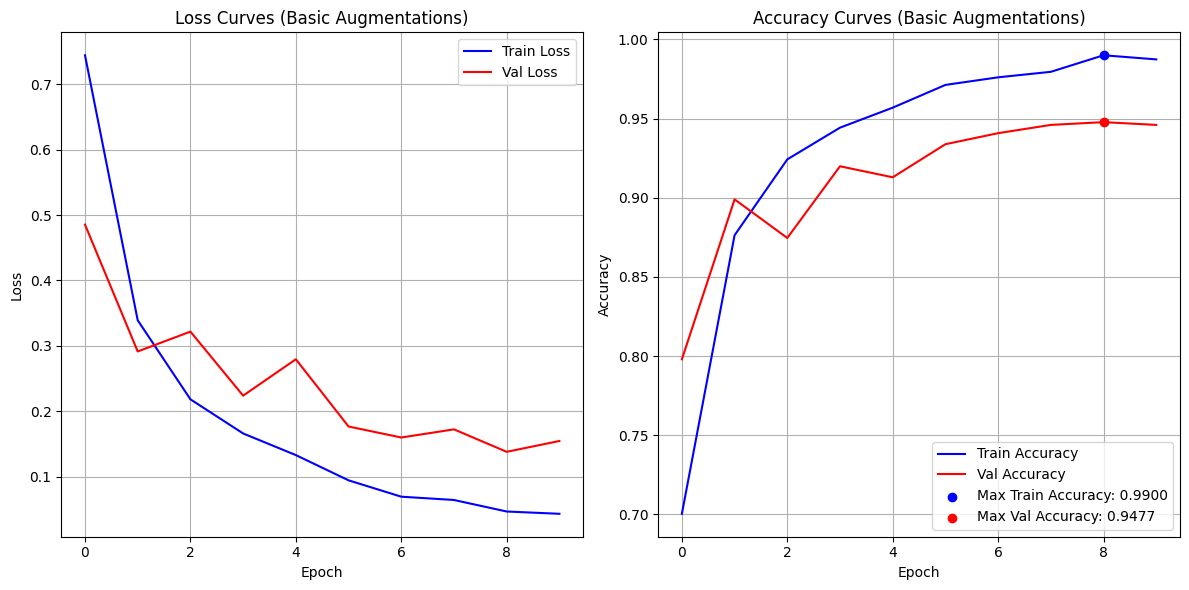

Precision: 0.8257, Recall: 0.7622, F1-Score: 0.7326, Accuracy: 0.7640
AUC Scores per class: 0.8576, 0.9518, 0.9788, 0.9899
Macro-Average AUC: 0.9445


In [89]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Basic Augmentations")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

auc_scores, macro_auc = calculate_auc(model, test_loader, device)
print(f"AUC Scores per class: {auc_scores[0]:.4f}, {auc_scores[1]:.4f}, {auc_scores[2]:.4f}, {auc_scores[3]:.4f}")
print(f"Macro-Average AUC: {macro_auc:.4f}")

## Task 4

### Task 4.1

In [90]:
class EarlyStopping:
    def __init__(self, patience=3, delta=0):
        self.patience = patience
        self.delta = delta
        self.counter = 0
        self.best_loss = np.Inf
        self.early_stop = False

    def __call__(self, val_loss):
        if val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True


def train_model_with_early_stopping(
    model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs=10, device="cpu", patience=3, delta=0.001
):
    # Early stopping setup
    early_stopping = EarlyStopping(patience=patience, delta=delta)
    
    # Training and validation tracking
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    best_model_weights = None

    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")

        # Training loop
        model.train()
        running_loss, correct = 0.0, 0
        with tqdm(train_loader, desc="Training", unit="batch") as pbar:
            for images, labels in pbar:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                correct += (outputs.argmax(1) == labels).sum().item()
                pbar.set_postfix(loss=running_loss / len(train_loader))

        train_losses.append(running_loss / len(train_loader))
        train_accs.append(correct / len(train_loader.dataset))
        print(f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.4f}")

        # Validation loop
        model.eval()
        val_loss, correct = 0.0, 0
        with tqdm(val_loader, desc="Validating", unit="batch") as pbar:
            with torch.no_grad():
                for images, labels in pbar:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    correct += (outputs.argmax(1) == labels).sum().item()
                    pbar.set_postfix(loss=val_loss / len(val_loader))

        val_losses.append(val_loss / len(val_loader))
        val_accs.append(correct / len(val_loader.dataset))
        print(f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

        # Check early stopping
        early_stopping(val_losses[-1])
        if early_stopping.early_stop:
            print("Stopped early")
            break

        # Save best model weights
        if val_losses[-1] == early_stopping.best_loss:
            best_model_weights = model.state_dict()

    # Load the best model weights
    if best_model_weights is not None:
        model.load_state_dict(best_model_weights)

    # Test evaluation
    model.eval()
    y_true, y_pred = [], []
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar:
        with torch.no_grad():
            for images, labels in pbar:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = outputs.argmax(1)
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())

    # Metrics
    precision = precision_score(y_true, y_pred, average="macro")
    recall = recall_score(y_true, y_pred, average="macro")
    f1 = f1_score(y_true, y_pred, average="macro")
    accuracy = accuracy_score(y_true, y_pred)

    return train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy


In [91]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 20
learning_rate = 0.001

basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=basic_transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = folds[0]

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model_with_early_stopping(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.19batch/s, loss=0.741]


Train Loss: 0.7414, Train Acc: 0.7064


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.03batch/s, loss=0.345]


Val Loss: 0.3449, Val Acc: 0.8850

Epoch 2/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.11batch/s, loss=0.327] 


Train Loss: 0.3269, Train Acc: 0.8794


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.85batch/s, loss=0.253]


Val Loss: 0.2532, Val Acc: 0.9042

Epoch 3/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.27batch/s, loss=0.211] 


Train Loss: 0.2106, Train Acc: 0.9233


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.37batch/s, loss=0.138] 


Val Loss: 0.1380, Val Acc: 0.9547

Epoch 4/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.28batch/s, loss=0.161]  


Train Loss: 0.1610, Train Acc: 0.9460


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.84batch/s, loss=0.166] 


Val Loss: 0.1659, Val Acc: 0.9408

Epoch 5/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.21batch/s, loss=0.116] 


Train Loss: 0.1163, Train Acc: 0.9617


Validating: 100%|██████████| 18/18 [00:03<00:00,  4.88batch/s, loss=0.113]  


Val Loss: 0.1132, Val Acc: 0.9686

Epoch 6/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.35batch/s, loss=0.0783]


Train Loss: 0.0783, Train Acc: 0.9787


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.78batch/s, loss=0.113]  


Val Loss: 0.1127, Val Acc: 0.9634

Epoch 7/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.30batch/s, loss=0.0774] 


Train Loss: 0.0774, Train Acc: 0.9774


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.47batch/s, loss=0.107] 


Val Loss: 0.1071, Val Acc: 0.9704

Epoch 8/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.35batch/s, loss=0.0532] 


Train Loss: 0.0532, Train Acc: 0.9848


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.96batch/s, loss=0.0862] 


Val Loss: 0.0862, Val Acc: 0.9704

Epoch 9/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.29batch/s, loss=0.0462] 


Train Loss: 0.0462, Train Acc: 0.9878


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.45batch/s, loss=0.111]  


Val Loss: 0.1106, Val Acc: 0.9547

Epoch 10/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.38batch/s, loss=0.0378] 


Train Loss: 0.0378, Train Acc: 0.9904


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.17batch/s, loss=0.07]   


Val Loss: 0.0700, Val Acc: 0.9756

Epoch 11/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.56batch/s, loss=0.029]  


Train Loss: 0.0290, Train Acc: 0.9926


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.47batch/s, loss=0.0882] 


Val Loss: 0.0882, Val Acc: 0.9652

Epoch 12/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.50batch/s, loss=0.0329] 


Train Loss: 0.0329, Train Acc: 0.9926


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.25batch/s, loss=0.0879]


Val Loss: 0.0879, Val Acc: 0.9721

Epoch 13/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.44batch/s, loss=0.0305] 


Train Loss: 0.0305, Train Acc: 0.9913


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.87batch/s, loss=0.0723] 


Val Loss: 0.0723, Val Acc: 0.9808
Stopped early


Testing: 100%|██████████| 13/13 [00:01<00:00,  7.49batch/s]


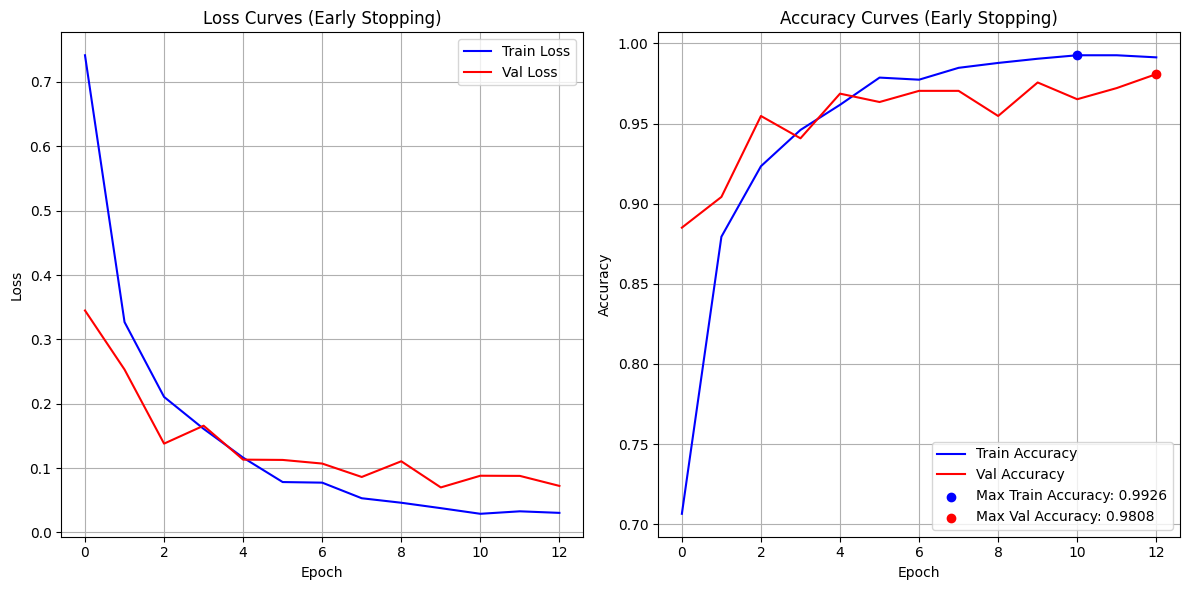

Precision: 0.8278, Recall: 0.7448, F1-Score: 0.7072, Accuracy: 0.7538


In [92]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Early Stopping")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

### Task 4.2

In [94]:
def train_model_with_scheduler(model, criterion, optimizer, scheduler, train_loader, val_loader, test_loader, num_epochs=10, device="cpu"):

    # Training and validation
    train_losses, val_losses, train_accs, val_accs = [], [], [], []
    for epoch in range(num_epochs):
        print(f"\nEpoch {epoch + 1}/{num_epochs}")
        
        # Training loop
        model.train()
        running_loss, correct = 0.0, 0
        with tqdm(train_loader, desc="Training", unit="batch") as pbar:
            for images, labels in pbar:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs = model(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()

                running_loss += loss.item()
                correct += (outputs.argmax(1) == labels).sum().item()
                pbar.set_postfix(loss=running_loss / len(train_loader))

        train_losses.append(running_loss / len(train_loader))
        train_accs.append(correct / len(train_loader.dataset))

        print(f"Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accs[-1]:.4f}")

        # Validation loop
        model.eval()
        val_loss, correct = 0.0, 0
        with tqdm(val_loader, desc="Validating", unit="batch") as pbar:
            with torch.no_grad():
                for images, labels in pbar:
                    images, labels = images.to(device), labels.to(device)
                    outputs = model(images)
                    loss = criterion(outputs, labels)
                    val_loss += loss.item()
                    correct += (outputs.argmax(1) == labels).sum().item()
                    pbar.set_postfix(loss=val_loss / len(val_loader))

        val_losses.append(val_loss / len(val_loader))
        val_accs.append(correct / len(val_loader.dataset))

        print(f"Val Loss: {val_losses[-1]:.4f}, Val Acc: {val_accs[-1]:.4f}")

        scheduler.step()

    # Test evaluation
    model.eval()
    y_true, y_pred = [], []
    with tqdm(test_loader, desc="Testing", unit="batch") as pbar:
        with torch.no_grad():
            for images, labels in pbar:
                images, labels = images.to(device), labels.to(device)
                outputs = model(images)
                preds = outputs.argmax(1)
                y_true.extend(labels.cpu().numpy())
                y_pred.extend(preds.cpu().numpy())

    # Metrics
    precision = precision_score(y_true, y_pred, average="macro")
    recall = recall_score(y_true, y_pred, average="macro")
    f1 = f1_score(y_true, y_pred, average="macro")
    accuracy = accuracy_score(y_true, y_pred)
    return train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy


In [97]:
class_counts = Counter(numeric_targets)

batch_size = 32
num_epochs = 20
learning_rate = 0.01

basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=basic_transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

# Get indices for the first fold
train_idx, val_idx = folds[0]

# Subsets for training and validation
train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.resnet18(weights="IMAGENET1K_V1")
model.fc = nn.Linear(model.fc.in_features, 4)
model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model_with_scheduler(model, criterion, optimizer, scheduler, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.36batch/s, loss=0.637]


Train Loss: 0.6374, Train Acc: 0.7692


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.69batch/s, loss=1.28]  


Val Loss: 1.2761, Val Acc: 0.7073

Epoch 2/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.74batch/s, loss=0.243] 


Train Loss: 0.2428, Train Acc: 0.9159


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.58batch/s, loss=1.82]


Val Loss: 1.8213, Val Acc: 0.4373

Epoch 3/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.61batch/s, loss=0.163]  


Train Loss: 0.1625, Train Acc: 0.9464


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.11batch/s, loss=0.145] 


Val Loss: 0.1448, Val Acc: 0.9477

Epoch 4/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.53batch/s, loss=0.103]  


Train Loss: 0.1035, Train Acc: 0.9669


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.20batch/s, loss=0.449]


Val Loss: 0.4494, Val Acc: 0.8850

Epoch 5/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.19batch/s, loss=0.126] 


Train Loss: 0.1260, Train Acc: 0.9560


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.76batch/s, loss=0.0805] 


Val Loss: 0.0805, Val Acc: 0.9686

Epoch 6/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.69batch/s, loss=0.037]  


Train Loss: 0.0370, Train Acc: 0.9878


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.08batch/s, loss=0.0858]


Val Loss: 0.0858, Val Acc: 0.9686

Epoch 7/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.42batch/s, loss=0.03]   


Train Loss: 0.0300, Train Acc: 0.9904


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.88batch/s, loss=0.0623] 


Val Loss: 0.0623, Val Acc: 0.9791

Epoch 8/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.27batch/s, loss=0.0249] 


Train Loss: 0.0249, Train Acc: 0.9935


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.81batch/s, loss=0.0631]


Val Loss: 0.0631, Val Acc: 0.9791

Epoch 9/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.10batch/s, loss=0.0217] 


Train Loss: 0.0217, Train Acc: 0.9943


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.35batch/s, loss=0.0633]


Val Loss: 0.0633, Val Acc: 0.9774

Epoch 10/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.27batch/s, loss=0.0167] 


Train Loss: 0.0167, Train Acc: 0.9952


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.16batch/s, loss=0.0592] 


Val Loss: 0.0592, Val Acc: 0.9861

Epoch 11/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.58batch/s, loss=0.0141] 


Train Loss: 0.0141, Train Acc: 0.9974


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.94batch/s, loss=0.0656]


Val Loss: 0.0656, Val Acc: 0.9791

Epoch 12/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.51batch/s, loss=0.0121] 


Train Loss: 0.0121, Train Acc: 0.9974


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.03batch/s, loss=0.0542]


Val Loss: 0.0542, Val Acc: 0.9808

Epoch 13/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.30batch/s, loss=0.0176] 


Train Loss: 0.0176, Train Acc: 0.9952


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.52batch/s, loss=0.0697] 


Val Loss: 0.0697, Val Acc: 0.9826

Epoch 14/20


Training: 100%|██████████| 72/72 [00:15<00:00,  4.54batch/s, loss=0.0152] 


Train Loss: 0.0152, Train Acc: 0.9970


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.18batch/s, loss=0.0653] 


Val Loss: 0.0653, Val Acc: 0.9791

Epoch 15/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.42batch/s, loss=0.011]  


Train Loss: 0.0110, Train Acc: 0.9983


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.16batch/s, loss=0.0488]


Val Loss: 0.0488, Val Acc: 0.9878

Epoch 16/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.48batch/s, loss=0.0164] 


Train Loss: 0.0164, Train Acc: 0.9961


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.15batch/s, loss=0.0625]


Val Loss: 0.0625, Val Acc: 0.9774

Epoch 17/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.40batch/s, loss=0.0145] 


Train Loss: 0.0145, Train Acc: 0.9956


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.93batch/s, loss=0.0628]


Val Loss: 0.0628, Val Acc: 0.9826

Epoch 18/20


Training: 100%|██████████| 72/72 [00:16<00:00,  4.46batch/s, loss=0.0147] 


Train Loss: 0.0147, Train Acc: 0.9956


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.04batch/s, loss=0.061] 


Val Loss: 0.0610, Val Acc: 0.9861

Epoch 19/20


Training: 100%|██████████| 72/72 [00:18<00:00,  3.95batch/s, loss=0.0121] 


Train Loss: 0.0121, Train Acc: 0.9974


Validating: 100%|██████████| 18/18 [00:02<00:00,  6.44batch/s, loss=0.0648]


Val Loss: 0.0648, Val Acc: 0.9739

Epoch 20/20


Training: 100%|██████████| 72/72 [00:17<00:00,  4.11batch/s, loss=0.0137]  


Train Loss: 0.0137, Train Acc: 0.9965


Validating: 100%|██████████| 18/18 [00:03<00:00,  5.25batch/s, loss=0.0659]


Val Loss: 0.0659, Val Acc: 0.9774


Testing: 100%|██████████| 13/13 [00:01<00:00,  7.26batch/s]


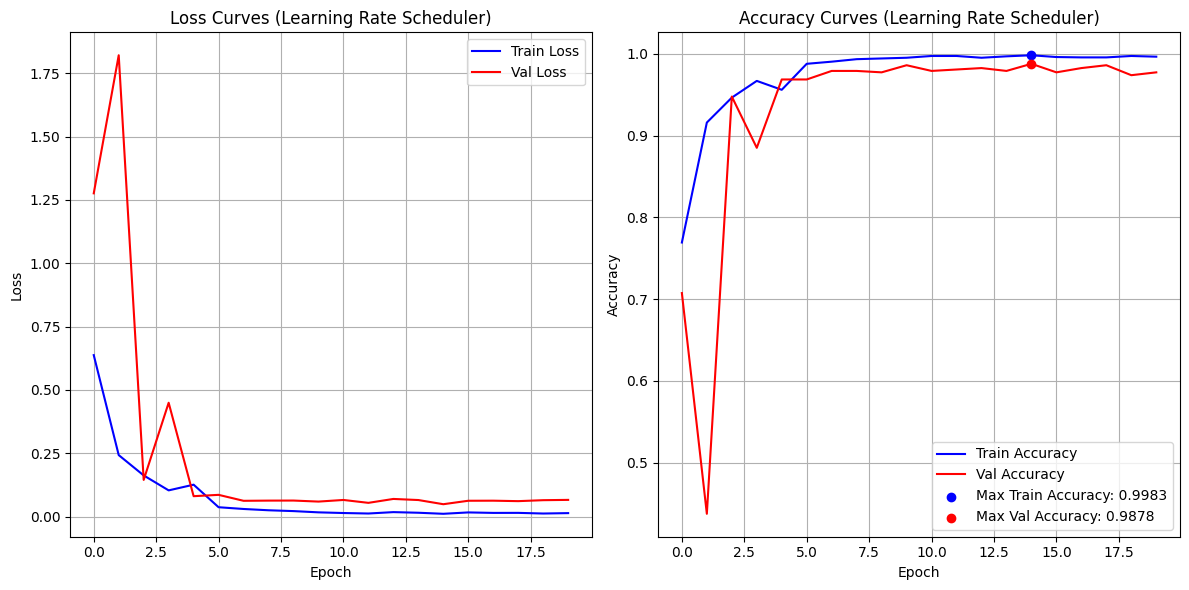

Precision: 0.8418, Recall: 0.7409, F1-Score: 0.7145, Accuracy: 0.7538


In [98]:
plot_accuracies_and_losses(train_losses, val_losses, train_accs, val_accs, "Learning Rate Scheduler")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

## Task 5

### Task 5.1

In [139]:
class_counts = Counter(numeric_targets)

batch_size = 16
num_epochs = 20
learning_rate = 0.001

basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=basic_transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

train_idx, val_idx = folds[0]

train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

In [140]:
train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

### Task 5.2

In [141]:
class FocalLoss(nn.Module):
    def __init__(self, alpha=0.5, gamma=2, reduction="mean"):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        ce_loss = F.cross_entropy(inputs, targets, reduction="none")
        p_t = torch.exp(-ce_loss)
        focal_loss = self.alpha * (1 - p_t) ** self.gamma * ce_loss

        if self.reduction == "mean":
            return focal_loss.mean()
        elif self.reduction == "sum":
            return focal_loss.sum()
        else:
            return focal_loss

In [152]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.resnet18(weights="IMAGENET1K_V1")


model.fc = nn.Sequential(
    nn.Linear(model.fc.in_features, 256),
    nn.ReLU(),
    nn.Dropout(0.3),
    nn.Linear(256, 4)
)

model.fc = nn.Linear(model.fc.in_features, 4)

model = model.to(device)

#criterion = FocalLoss(alpha=1, gamma=3, reduction="mean")
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
#optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-5)
#optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/20


Training: 100%|██████████| 18/18 [00:15<00:00,  1.14batch/s, loss=1.37] 


Train Loss: 1.3663, Train Acc: 0.3010


Validating: 100%|██████████| 5/5 [00:03<00:00,  1.55batch/s, loss=1.26] 


Val Loss: 1.2605, Val Acc: 0.4216

Epoch 2/20


Training: 100%|██████████| 18/18 [00:15<00:00,  1.13batch/s, loss=1.17] 


Train Loss: 1.1697, Train Acc: 0.5571


Validating: 100%|██████████| 5/5 [00:02<00:00,  1.70batch/s, loss=1.13] 


Val Loss: 1.1300, Val Acc: 0.5976

Epoch 3/20


Training: 100%|██████████| 18/18 [00:15<00:00,  1.15batch/s, loss=0.956]


Train Loss: 0.9559, Train Acc: 0.6855


Validating: 100%|██████████| 5/5 [00:02<00:00,  1.68batch/s, loss=0.915]


Val Loss: 0.9147, Val Acc: 0.6951

Epoch 4/20


Training: 100%|██████████| 18/18 [00:15<00:00,  1.15batch/s, loss=0.752]


Train Loss: 0.7521, Train Acc: 0.7530


Validating: 100%|██████████| 5/5 [00:03<00:00,  1.47batch/s, loss=0.665]


Val Loss: 0.6648, Val Acc: 0.7909

Epoch 5/20


Training:   0%|          | 0/18 [00:00<?, ?batch/s]


KeyboardInterrupt: 

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\asyncio\selector_events.py", line 132, in _read_from_self
    data = self._ssock.recv(4096)
           ^^^^^^^^^^^^^^^^^^^^^^
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\asyncio\events.py", line 88, in _run
    self._context.run(self._callback, *self._args)
  File "c:\Users\Alex\AppData\Local\Programs\Python\Python312\Lib\asyncio\selector_events.p

In [151]:
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")
auc_scores, macro_auc = calculate_auc(model, test_loader, device)
print(f"AUC Scores per class: {auc_scores[0]:.4f}, {auc_scores[1]:.4f}, {auc_scores[2]:.4f}, {auc_scores[3]:.4f}")
print(f"Macro-Average AUC: {macro_auc:.4f}")

Precision: 0.7899, Recall: 0.6736, F1-Score: 0.6491, Accuracy: 0.6904
AUC Scores per class: 0.8006, 0.9357, 0.9552, 0.9531
Macro-Average AUC: 0.9112


## Bonus 2

In [3]:
def plot_accuracies_and_losses_2(train_losses, val_losses, train_accuracies, val_accuracies, title):

    max_train_accuracy = max(train_accuracies)
    max_val_accuracy = max(val_accuracies)
    max_train_epoch = train_accuracies.index(max_train_accuracy)
    max_val_epoch = val_accuracies.index(max_val_accuracy)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label="Train Loss", color='g')
    plt.plot(val_losses, label="Val Loss", color='m')
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curves ({title})")
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.plot(train_accuracies, label="Train Accuracy", color='g')
    plt.plot(val_accuracies, label="Val Accuracy", color='m')
    plt.scatter(max_train_epoch, max_train_accuracy, color='g', label=f"Max Train Accuracy: {max_train_accuracy:.4f}", zorder=5)
    plt.scatter(max_val_epoch, max_val_accuracy, color='m', label=f"Max Val Accuracy: {max_val_accuracy:.4f}", zorder=5)

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.title(f"Accuracy Curves ({title})")
    plt.legend()
    plt.grid()

    plt.tight_layout()
    plt.show()

In [17]:
basic_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
])

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
])

train_ds = BrainTumorDataset(root_dir='./Training', transform=transform)
test_ds = BrainTumorDataset(root_dir='./Testing', transform=transform)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

targets = [train_ds.image_labels[i] for i in range(len(train_ds))]
numeric_targets = [train_ds.labels.index(label) for label in targets]

train_idx, val_idx = next(iter(skf.split(train_ds.image_paths, numeric_targets)))

train_subset = Subset(train_ds, train_idx)
val_subset = Subset(train_ds, val_idx)

subset_targets = [numeric_targets[i] for i in train_idx]
class_counts = Counter(subset_targets)
class_weights = {label: 1.0 / count for label, count in class_counts.items()}
weights = [class_weights[numeric_targets[i]] for i in train_idx]

sampler = WeightedRandomSampler(weights, num_samples=len(train_idx))

batch_size = 16

train_loader = DataLoader(train_subset, sampler=sampler, batch_size=batch_size)
val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_ds, batch_size=batch_size, shuffle=False)

In [5]:
print(f"Train Size: {len(train_subset)}, Val Size: {len(val_subset)}")

Train Size: 2296, Val Size: 574


In [18]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.efficientnet_b0(weights="IMAGENET1K_V1")
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 4)

model = model.to(device)

learning_rate = 0.001
num_epochs = 20

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/20


Training: 100%|██████████| 144/144 [00:22<00:00,  6.38batch/s, loss=0.852]


Train Loss: 0.8523, Train Acc: 0.7112


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.16batch/s, loss=0.421] 


Val Loss: 0.4212, Val Acc: 0.8763

Epoch 2/20


Training: 100%|██████████| 144/144 [00:22<00:00,  6.40batch/s, loss=0.404]


Train Loss: 0.4038, Train Acc: 0.8619


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.37batch/s, loss=0.272] 


Val Loss: 0.2716, Val Acc: 0.8990

Epoch 3/20


Training: 100%|██████████| 144/144 [00:22<00:00,  6.34batch/s, loss=0.285]


Train Loss: 0.2853, Train Acc: 0.9068


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.37batch/s, loss=0.176] 


Val Loss: 0.1765, Val Acc: 0.9460

Epoch 4/20


Training: 100%|██████████| 144/144 [00:22<00:00,  6.31batch/s, loss=0.187] 


Train Loss: 0.1869, Train Acc: 0.9382


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.92batch/s, loss=0.15]  


Val Loss: 0.1496, Val Acc: 0.9477

Epoch 5/20


Training: 100%|██████████| 144/144 [00:23<00:00,  6.25batch/s, loss=0.164] 


Train Loss: 0.1638, Train Acc: 0.9486


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.86batch/s, loss=0.13]  


Val Loss: 0.1300, Val Acc: 0.9477

Epoch 6/20


Training: 100%|██████████| 144/144 [00:22<00:00,  6.29batch/s, loss=0.134] 


Train Loss: 0.1338, Train Acc: 0.9578


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.08batch/s, loss=0.118] 


Val Loss: 0.1179, Val Acc: 0.9495

Epoch 7/20


Training: 100%|██████████| 144/144 [00:22<00:00,  6.29batch/s, loss=0.0989]


Train Loss: 0.0989, Train Acc: 0.9721


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.08batch/s, loss=0.103] 


Val Loss: 0.1031, Val Acc: 0.9617

Epoch 8/20


Training: 100%|██████████| 144/144 [00:23<00:00,  6.22batch/s, loss=0.0908]


Train Loss: 0.0908, Train Acc: 0.9734


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.76batch/s, loss=0.0942] 


Val Loss: 0.0942, Val Acc: 0.9652

Epoch 9/20


Training: 100%|██████████| 144/144 [00:23<00:00,  6.21batch/s, loss=0.0865]


Train Loss: 0.0865, Train Acc: 0.9704


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.19batch/s, loss=0.0767] 


Val Loss: 0.0767, Val Acc: 0.9739

Epoch 10/20


Training: 100%|██████████| 144/144 [00:22<00:00,  6.48batch/s, loss=0.0623]


Train Loss: 0.0623, Train Acc: 0.9856


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.94batch/s, loss=0.0838] 


Val Loss: 0.0838, Val Acc: 0.9704

Epoch 11/20


Training: 100%|██████████| 144/144 [00:22<00:00,  6.44batch/s, loss=0.0445]


Train Loss: 0.0445, Train Acc: 0.9887


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.77batch/s, loss=0.0826] 


Val Loss: 0.0826, Val Acc: 0.9704

Epoch 12/20


Training: 100%|██████████| 144/144 [00:21<00:00,  6.59batch/s, loss=0.0501] 


Train Loss: 0.0501, Train Acc: 0.9865


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.36batch/s, loss=0.0778] 


Val Loss: 0.0778, Val Acc: 0.9739

Epoch 13/20


Training: 100%|██████████| 144/144 [00:23<00:00,  6.06batch/s, loss=0.0409]


Train Loss: 0.0409, Train Acc: 0.9909


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.53batch/s, loss=0.0741] 


Val Loss: 0.0741, Val Acc: 0.9704

Epoch 14/20


Training: 100%|██████████| 144/144 [00:26<00:00,  5.41batch/s, loss=0.0501]


Train Loss: 0.0501, Train Acc: 0.9839


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.77batch/s, loss=0.0924] 


Val Loss: 0.0924, Val Acc: 0.9686

Epoch 15/20


Training: 100%|██████████| 144/144 [00:24<00:00,  5.93batch/s, loss=0.0412]


Train Loss: 0.0412, Train Acc: 0.9869


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.84batch/s, loss=0.0748] 


Val Loss: 0.0748, Val Acc: 0.9774

Epoch 16/20


Training: 100%|██████████| 144/144 [00:24<00:00,  5.93batch/s, loss=0.0368]


Train Loss: 0.0368, Train Acc: 0.9909


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.65batch/s, loss=0.0903] 


Val Loss: 0.0903, Val Acc: 0.9721

Epoch 17/20


Training: 100%|██████████| 144/144 [00:23<00:00,  6.06batch/s, loss=0.0299]


Train Loss: 0.0299, Train Acc: 0.9913


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.39batch/s, loss=0.0732] 


Val Loss: 0.0732, Val Acc: 0.9739

Epoch 18/20


Training: 100%|██████████| 144/144 [00:23<00:00,  6.16batch/s, loss=0.026] 


Train Loss: 0.0260, Train Acc: 0.9930


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.93batch/s, loss=0.0624] 


Val Loss: 0.0624, Val Acc: 0.9808

Epoch 19/20


Training: 100%|██████████| 144/144 [00:23<00:00,  6.09batch/s, loss=0.0333]


Train Loss: 0.0333, Train Acc: 0.9891


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.58batch/s, loss=0.0846] 


Val Loss: 0.0846, Val Acc: 0.9721

Epoch 20/20


Training: 100%|██████████| 144/144 [00:23<00:00,  6.14batch/s, loss=0.0221]


Train Loss: 0.0221, Train Acc: 0.9939


Validating: 100%|██████████| 36/36 [00:03<00:00, 11.46batch/s, loss=0.0831] 


Val Loss: 0.0831, Val Acc: 0.9756


Testing: 100%|██████████| 25/25 [00:02<00:00, 11.76batch/s]


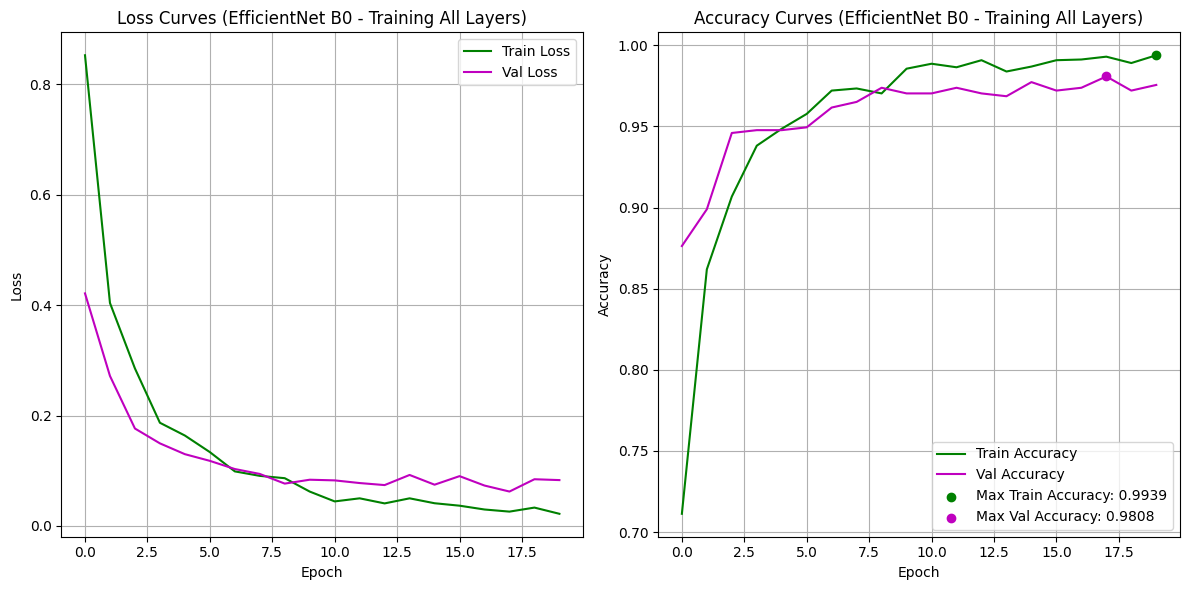

Precision: 0.8474, Recall: 0.7698, F1-Score: 0.7497, Accuracy: 0.7792


In [19]:
plot_accuracies_and_losses_2(train_losses, val_losses, train_accs, val_accs, "EfficientNet B0 - Training All Layers")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

In [24]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

model = models.efficientnet_b0(weights="IMAGENET1K_V1")

for param in model.features.parameters():
    param.requires_grad = False


model.classifier[1] = nn.Linear(model.classifier[1].in_features, 4)

model = model.to(device)

learning_rate = 0.001
num_epochs = 20

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)

train_losses, val_losses, train_accs, val_accs, precision, recall, f1, accuracy = train_model(model, criterion, optimizer, train_loader, val_loader, test_loader, num_epochs, device)

cuda

Epoch 1/20


Training: 100%|██████████| 144/144 [00:15<00:00,  9.60batch/s, loss=0.977]


Train Loss: 0.9766, Train Acc: 0.6699


Validating: 100%|██████████| 36/36 [00:03<00:00,  9.98batch/s, loss=0.652]


Val Loss: 0.6515, Val Acc: 0.8118

Epoch 2/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.92batch/s, loss=0.624]


Train Loss: 0.6238, Train Acc: 0.8158


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.16batch/s, loss=0.502]


Val Loss: 0.5020, Val Acc: 0.8502

Epoch 3/20


Training: 100%|██████████| 144/144 [00:14<00:00, 10.00batch/s, loss=0.523]


Train Loss: 0.5228, Train Acc: 0.8371


Validating: 100%|██████████| 36/36 [00:03<00:00,  9.87batch/s, loss=0.427]


Val Loss: 0.4266, Val Acc: 0.8798

Epoch 4/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.90batch/s, loss=0.49] 


Train Loss: 0.4903, Train Acc: 0.8267


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.36batch/s, loss=0.398] 


Val Loss: 0.3984, Val Acc: 0.8746

Epoch 5/20


Training: 100%|██████████| 144/144 [00:14<00:00, 10.08batch/s, loss=0.476]


Train Loss: 0.4764, Train Acc: 0.8328


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.08batch/s, loss=0.377]


Val Loss: 0.3775, Val Acc: 0.8833

Epoch 6/20


Training: 100%|██████████| 144/144 [00:14<00:00, 10.00batch/s, loss=0.412]


Train Loss: 0.4115, Train Acc: 0.8606


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.23batch/s, loss=0.372]


Val Loss: 0.3717, Val Acc: 0.8780

Epoch 7/20


Training: 100%|██████████| 144/144 [00:14<00:00, 10.09batch/s, loss=0.413]


Train Loss: 0.4126, Train Acc: 0.8663


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.12batch/s, loss=0.351] 


Val Loss: 0.3511, Val Acc: 0.8850

Epoch 8/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.91batch/s, loss=0.393]


Train Loss: 0.3931, Train Acc: 0.8711


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.13batch/s, loss=0.333] 


Val Loss: 0.3329, Val Acc: 0.8955

Epoch 9/20


Training: 100%|██████████| 144/144 [00:14<00:00, 10.09batch/s, loss=0.394]


Train Loss: 0.3937, Train Acc: 0.8615


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.42batch/s, loss=0.346] 


Val Loss: 0.3459, Val Acc: 0.8850

Epoch 10/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.96batch/s, loss=0.375]


Train Loss: 0.3747, Train Acc: 0.8728


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.19batch/s, loss=0.325] 


Val Loss: 0.3253, Val Acc: 0.8920

Epoch 11/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.79batch/s, loss=0.379]


Train Loss: 0.3794, Train Acc: 0.8680


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.22batch/s, loss=0.319] 


Val Loss: 0.3195, Val Acc: 0.9024

Epoch 12/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.86batch/s, loss=0.345]


Train Loss: 0.3452, Train Acc: 0.8807


Validating: 100%|██████████| 36/36 [00:03<00:00,  9.81batch/s, loss=0.312] 


Val Loss: 0.3122, Val Acc: 0.8920

Epoch 13/20


Training: 100%|██████████| 144/144 [00:14<00:00, 10.14batch/s, loss=0.35] 


Train Loss: 0.3502, Train Acc: 0.8711


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.26batch/s, loss=0.316] 


Val Loss: 0.3159, Val Acc: 0.8920

Epoch 14/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.81batch/s, loss=0.338]


Train Loss: 0.3375, Train Acc: 0.8859


Validating: 100%|██████████| 36/36 [00:03<00:00,  9.99batch/s, loss=0.315] 


Val Loss: 0.3154, Val Acc: 0.8920

Epoch 15/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.94batch/s, loss=0.315]


Train Loss: 0.3154, Train Acc: 0.8959


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.27batch/s, loss=0.293] 


Val Loss: 0.2926, Val Acc: 0.9024

Epoch 16/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.76batch/s, loss=0.313] 


Train Loss: 0.3130, Train Acc: 0.8872


Validating: 100%|██████████| 36/36 [00:03<00:00,  9.25batch/s, loss=0.304] 


Val Loss: 0.3042, Val Acc: 0.8955

Epoch 17/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.86batch/s, loss=0.297]


Train Loss: 0.2972, Train Acc: 0.8968


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.21batch/s, loss=0.296] 


Val Loss: 0.2957, Val Acc: 0.9007

Epoch 18/20


Training: 100%|██████████| 144/144 [00:14<00:00, 10.07batch/s, loss=0.289] 


Train Loss: 0.2891, Train Acc: 0.8981


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.18batch/s, loss=0.293] 


Val Loss: 0.2929, Val Acc: 0.8990

Epoch 19/20


Training: 100%|██████████| 144/144 [00:14<00:00, 10.10batch/s, loss=0.309]


Train Loss: 0.3087, Train Acc: 0.8942


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.05batch/s, loss=0.282] 


Val Loss: 0.2820, Val Acc: 0.8920

Epoch 20/20


Training: 100%|██████████| 144/144 [00:14<00:00,  9.91batch/s, loss=0.294]


Train Loss: 0.2936, Train Acc: 0.8933


Validating: 100%|██████████| 36/36 [00:03<00:00, 10.09batch/s, loss=0.281] 


Val Loss: 0.2806, Val Acc: 0.8955


Testing: 100%|██████████| 25/25 [00:02<00:00, 11.32batch/s]


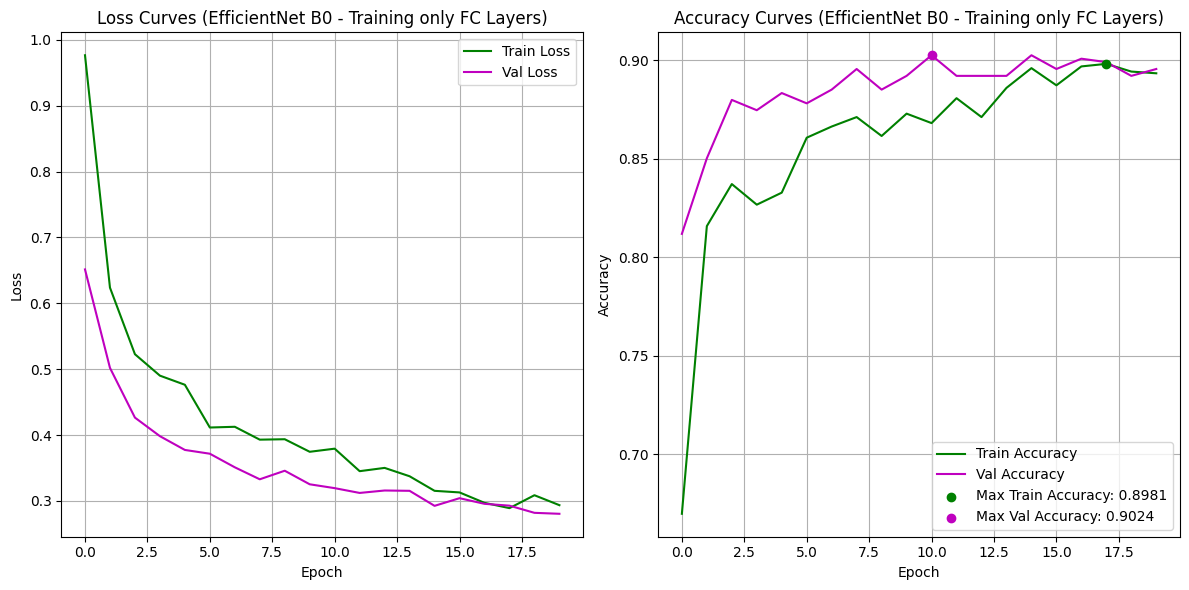

Precision: 0.7324, Recall: 0.5917, F1-Score: 0.5663, Accuracy: 0.6066


In [26]:
plot_accuracies_and_losses_2(train_losses, val_losses, train_accs, val_accs, "EfficientNet B0 - Training only FC Layers")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, Accuracy: {accuracy:.4f}")